# libraries

In [1]:
# at first we attach necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder

# information file 

In [2]:
#paste information file,format as csv
df = pd.read_csv("C:\\Users\\GANDI\\Downloads\\archive (1)\\housePrice.csv")
pd.set_option("display.float_format", "{:.0f}".format)

# check the content

In [3]:
# we use .info() for checking the content and reforms
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3479 entries, 0 to 3478
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Area        3479 non-null   object 
 1   Room        3479 non-null   int64  
 2   Parking     3479 non-null   bool   
 3   Warehouse   3479 non-null   bool   
 4   Elevator    3479 non-null   bool   
 5   Address     3456 non-null   object 
 6   Price       3479 non-null   int64  
 7   Price(USD)  3479 non-null   float64
dtypes: bool(3), float64(1), int64(2), object(2)
memory usage: 146.2+ KB


# cleaning data

In [4]:
# creat Data Frame
df = pd.DataFrame(df)

In [5]:
#clean the NaN data since the number is few
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3456 entries, 0 to 3478
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Area        3456 non-null   object 
 1   Room        3456 non-null   int64  
 2   Parking     3456 non-null   bool   
 3   Warehouse   3456 non-null   bool   
 4   Elevator    3456 non-null   bool   
 5   Address     3456 non-null   object 
 6   Price       3456 non-null   int64  
 7   Price(USD)  3456 non-null   float64
dtypes: bool(3), float64(1), int64(2), object(2)
memory usage: 172.1+ KB


In [7]:
#boolean data change to int data cause data are between 0 to 255 so we reduse memory size
columns = ["Parking", "Warehouse", "Elevator"]
df[columns] = df[columns].astype("uint8")
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3456 entries, 0 to 3478
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Area        3456 non-null   object 
 1   Room        3456 non-null   int64  
 2   Parking     3456 non-null   uint8  
 3   Warehouse   3456 non-null   uint8  
 4   Elevator    3456 non-null   uint8  
 5   Address     3456 non-null   object 
 6   Price       3456 non-null   int64  
 7   Price(USD)  3456 non-null   float64
dtypes: float64(1), int64(2), object(2), uint8(3)
memory usage: 172.1+ KB


In [8]:
# reduce memory size
df["Room"] = df["Room"].astype("uint8")
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3456 entries, 0 to 3478
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Area        3456 non-null   object 
 1   Room        3456 non-null   uint8  
 2   Parking     3456 non-null   uint8  
 3   Warehouse   3456 non-null   uint8  
 4   Elevator    3456 non-null   uint8  
 5   Address     3456 non-null   object 
 6   Price       3456 non-null   int64  
 7   Price(USD)  3456 non-null   float64
dtypes: float64(1), int64(1), object(2), uint8(4)
memory usage: 148.5+ KB


In [9]:
#content area column to numeric content
df = df[pd.to_numeric(df["Area"], errors="coerce").notna()]
df["Area"] = df["Area"].astype("uint16")
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3450 entries, 0 to 3478
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Area        3450 non-null   uint16 
 1   Room        3450 non-null   uint8  
 2   Parking     3450 non-null   uint8  
 3   Warehouse   3450 non-null   uint8  
 4   Elevator    3450 non-null   uint8  
 5   Address     3450 non-null   object 
 6   Price       3450 non-null   int64  
 7   Price(USD)  3450 non-null   float64
dtypes: float64(1), int64(1), object(1), uint16(1), uint8(4)
memory usage: 128.0+ KB


# Histogram

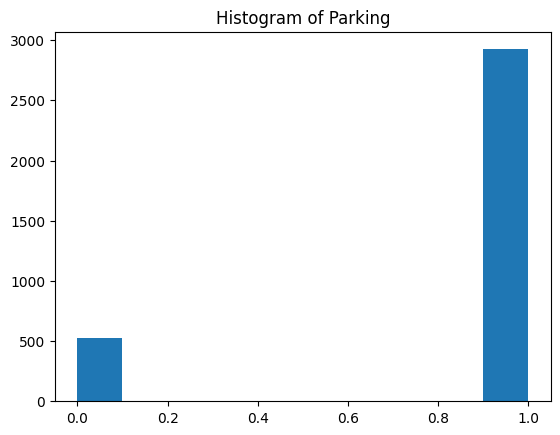

In [10]:
# at first we drawing histogram plots for datas can show with histogram
# Histogram of parking
col1 = "Parking"
plt.hist(df[col1])
plt.title(f"Histogram of {col1}")
plt.show()

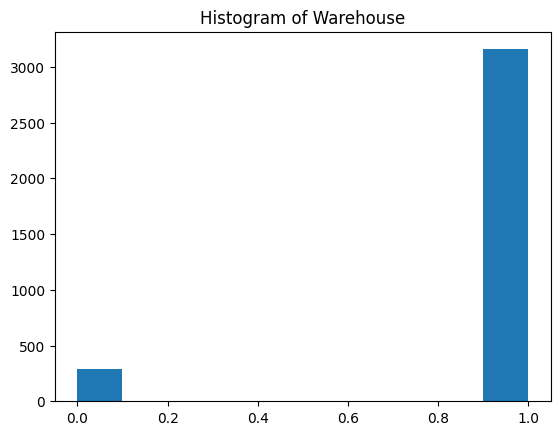

In [11]:
# Histogram of warehouse
col2= "Warehouse"
plt.hist(df[col2])
plt.title(f"Histogram of {col2}")
plt.show()

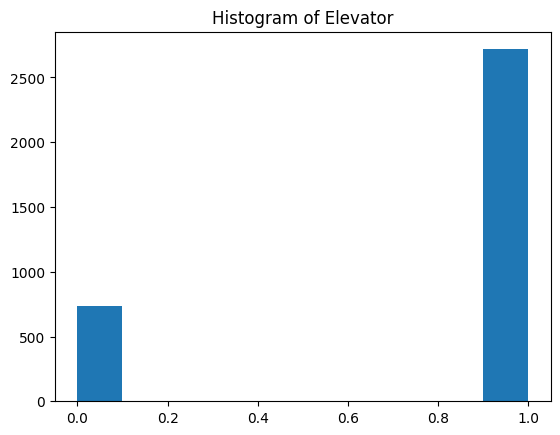

In [12]:
# Histogram of Elevator
col3 = "Elevator"
plt.hist(df[col3])
plt.title(f"Histogram of {col3}")
plt.show()

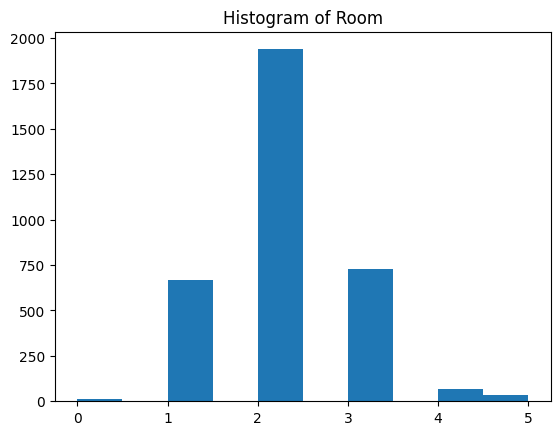

In [13]:
# Histogram of Rooms
col4= "Room"
plt.hist(df[col4])
plt.title(f"Histogram of {col4}")
plt.show()

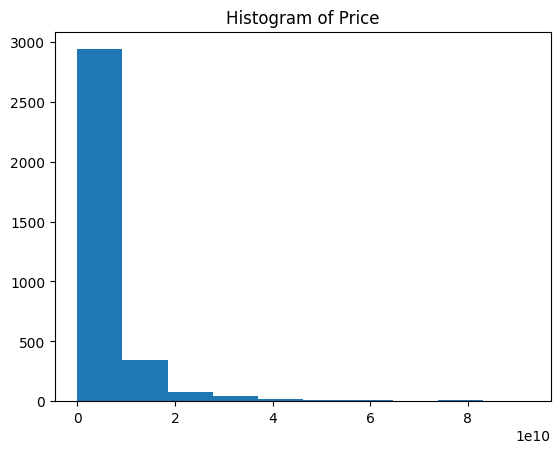

In [14]:
# Histogrom of price
col5= "Price"
plt.hist(df[col5])
plt.title(f"Histogram of {col5}")
plt.show()

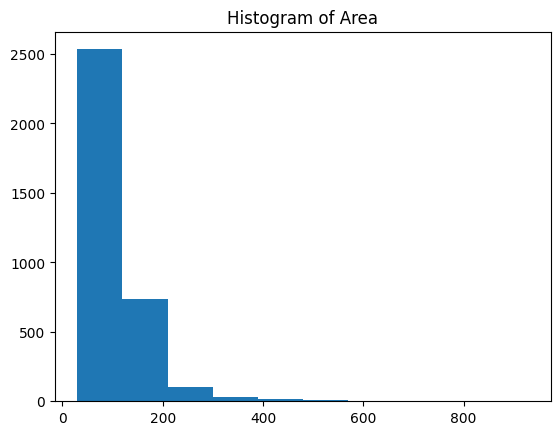

In [15]:
# Histogrom of Area
col6= "Area"
plt.hist(df[col6])
plt.title(f"Histogram of {col6}")
plt.show()

In [16]:
#necessary information
print(len(df))
print(df.describe())
Area1 = df["Area"].values
room = df["Room"].values
price = df["Price"].values
price_usd = df["Price(USD)"].values

3450
       Area  Room  Parking  Warehouse  Elevator       Price  Price(USD)
count  3450  3450     3450       3450      3450        3450        3450
mean    107     2        1          1         1  5375562609      179185
std      70     1        0          0         0  8125917967      270864
min      30     0        0          0         0     3600000         120
25%      69     2        1          1         1  1419250000       47308
50%      90     2        1          1         1  2900000000       96667
75%     120     2        1          1         1  6000000000      200000
max     929     5        1          1         1 92400000000     3080000


# find quarter
# find IQR
# draw BoxPlot
# draw violinplot

## Area
### Outlier Mean

In [17]:
#find outlier with mean
mean = Area1.mean()
std = Area1.std()
Upper_bond = mean + std * 2.5
Lower_bond = mean - std * 2.5
Outlier_mean = Area1[(Area1 > Upper_bond) | (Area1 < Lower_bond)]
outliers_index_mean = np.where((Area1 > Upper_bond) | (Area1 < Lower_bond))
print(dict(zip(Outlier_mean, outliers_index_mean)))


{np.uint16(300): array([  83,  189,  283,  284,  329,  338,  339,  348,  355,  429,  430,
        439,  463,  514,  515,  525,  559,  567,  571,  581,  727,  737,
        763,  813,  825,  833, 1002, 1133, 1228, 1255, 1262, 1267, 1324,
       1341, 1347, 1351, 1399, 1400, 1417, 1418, 1421, 1425, 1427, 1429,
       1430, 1435, 1480, 1543, 1625, 1684, 1690, 1697, 1713, 1730, 1799,
       1816, 1843, 1852, 1959, 1962, 1963, 2164, 2179, 2315, 2377, 2378,
       2458, 2463, 2566, 2629, 2675, 2688, 2704, 2760, 2830, 2980, 2996,
       3030, 3043, 3086, 3094, 3171, 3308])}


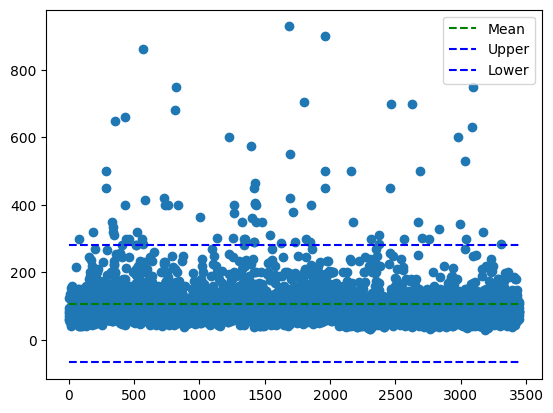

In [18]:
# outlier Mean Plot
x = np.arange(len(Area1))
plt.scatter(x,Area1)
plt.plot([0, len(df)],[mean, mean], "g--", label="Mean")
plt.plot([0, len(df)],[mean + std * 2.5, mean + std * 2.5], "b--", label="Upper")
plt.plot([0, len(df)],[mean - std * 2.5, mean - std * 2.5], "b--", label="Lower")
plt.legend()
plt.show()

In [19]:
# find quarter for area
Q1 = np.quantile(Area1, 0.25)
Q2 = np.quantile(Area1, 0.50)
Q3 = np.quantile(Area1, 0.75)
print(Q1, Q2, Q3)

69.0 90.0 120.0


### Outlier IQR

In [20]:
# find outlier with IQR
Q1 = np.quantile(Area1, 0.25)
Q2 = np.quantile(Area1, 0.50)
Q3 = np.quantile(Area1, 0.75)
IQR = Q3 - Q1
upper_bond = Q3 + IQR * 2.5
lower_bond = Q1 - IQR * 2.5
Outlier_IQR = Area1[(Area1 > Upper_bond) | (Area1 < Lower_bond)]
outliers_index_IQR = np.where((Area1 > Upper_bond) | (Area1 < Lower_bond))
print(dict(zip(Outlier_IQR, outliers_index_IQR)))


{np.uint16(300): array([  83,  189,  283,  284,  329,  338,  339,  348,  355,  429,  430,
        439,  463,  514,  515,  525,  559,  567,  571,  581,  727,  737,
        763,  813,  825,  833, 1002, 1133, 1228, 1255, 1262, 1267, 1324,
       1341, 1347, 1351, 1399, 1400, 1417, 1418, 1421, 1425, 1427, 1429,
       1430, 1435, 1480, 1543, 1625, 1684, 1690, 1697, 1713, 1730, 1799,
       1816, 1843, 1852, 1959, 1962, 1963, 2164, 2179, 2315, 2377, 2378,
       2458, 2463, 2566, 2629, 2675, 2688, 2704, 2760, 2830, 2980, 2996,
       3030, 3043, 3086, 3094, 3171, 3308])}


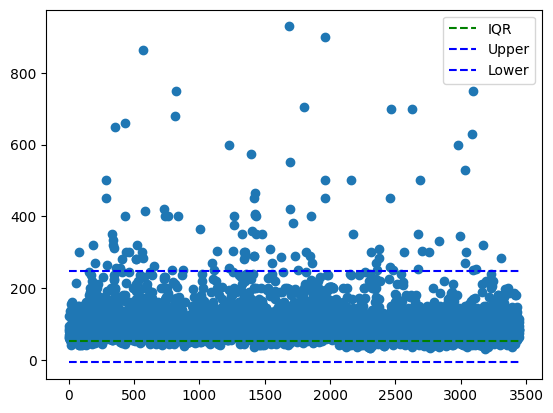

In [21]:
# outlier IQR plot
x = np.arange(len(Area1))
plt.scatter(x,Area1)
plt.plot([0, len(df)],[IQR, IQR], "g--", label="IQR")
plt.plot([0, len(df)],[Q3 + IQR * 2.5, Q3 + IQR * 2.5], "b--", label="Upper")
plt.plot([0, len(df)],[Q3 - IQR * 2.5, Q3 - IQR * 2.5], "b--", label="Lower")
plt.legend()
plt.show()

In [ ]:
#find common outlier
ou = pd.DataFrame(np.c_[x,Area1], columns=["ID", "Area"])
ou["Outlier_mean"] = 0
ou["Outlier_IQR"] = 0
ou.loc[outliers_index_mean, "Outlier_mean"] = 1
ou.loc[outliers_index_IQR, "Outlier_IQR"] = 1
ou["outlier"] = (df["Outlier_mean"] + df["Outlier_IQR"]) / 2
ou

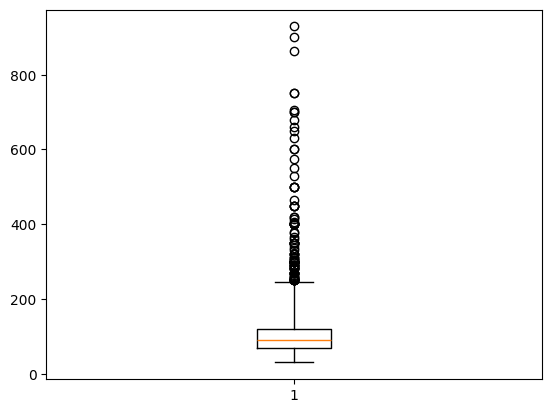

In [28]:
# drawing BoxPlot
plt.boxplot(Area1, whis=2.5)
plt.show()


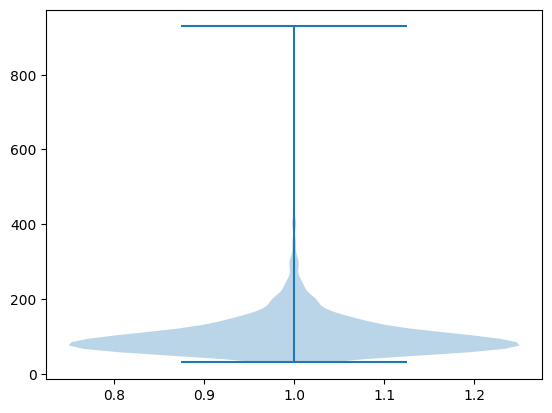

In [ ]:
#drawing violinplot
plt.violinplot(Area1)
plt.show()

## Room
### outlier mean

In [29]:
#find outlier with mean
mean = room.mean()
std = room.std()
Upper_bond = mean + std * 4
Lower_bond = mean - std * 4
Outlier_mean = room[(room > Upper_bond) | (room < Lower_bond)]
outliers_index_mean = np.where((room > Upper_bond) | (room < Lower_bond))[0]
print(dict(zip(Outlier_mean, outliers_index_mean)))

{}


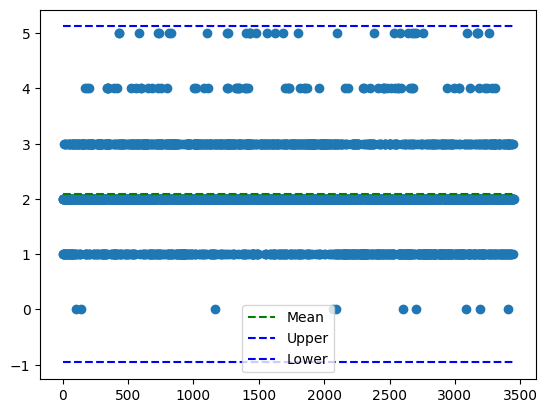

In [30]:
# outlier Mean Plot
x = np.arange(len(room))
plt.scatter(x,room)
plt.plot([0, len(df)],[mean, mean], "g--", label="Mean")
plt.plot([0, len(df)],[mean + std * 4, mean + std * 4], "b--", label="Upper")
plt.plot([0, len(df)],[mean - std * 4, mean - std * 4], "b--", label="Lower")
plt.legend()
plt.show()

### outlier IQR

In [31]:
# find outlier with IQR
Q1 = np.quantile(Area1, 0.25)
Q2 = np.quantile(Area1, 0.50)
Q3 = np.quantile(Area1, 0.75)
IQR = Q3 - Q1
upper_bond = Q3 + IQR * 4
lower_bond = Q1 - IQR * 4
Outlier_IQR = room[(room > Upper_bond) | (room < Lower_bond)]
outliers_index_IQR = np.where((room > Upper_bond) | (room < Lower_bond))[0]
print(dict(zip(Outlier_IQR, outliers_index_IQR)))

{}


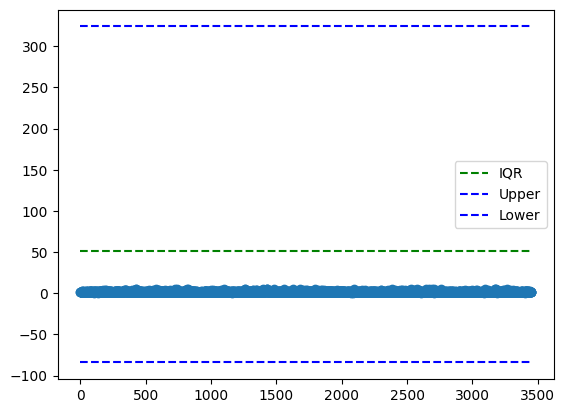

In [32]:
# IQR plot
x = np.arange(len(room))
plt.scatter(x,room)
lower_bond = Q1 - IQR * 4
plt.plot([0, len(df)],[IQR, IQR], "g--", label="IQR")
plt.plot([0, len(df)],[Q3 + IQR * 4, Q3 + IQR * 4], "b--", label="Upper")
plt.plot([0, len(df)],[Q3 - IQR * 4, Q3 - IQR * 4], "b--", label="Lower")
plt.legend()
plt.show()

In [33]:
#find common outlier
ou = pd.DataFrame(np.c_[x,room], columns=["ID", "room"])
ou["Outlier_mean"] = 0
ou["Outlier_IQR"] = 1
ou.loc[outliers_index_mean, "Outlier_mean"] = 1
ou.loc[outliers_index_IQR, "Outlier_IQR"] = 1
ou["Outlier"] = (ou["Outlier_mean"] + ou["Outlier_IQR"]) /2
ou

ID  room  Outlier_mean  Outlier_IQR  Outlier
0        0     1             0            1        0
1        1     1             0            1        0
2        2     2             0            1        0
3        3     2             0            1        0
4        4     2             0            1        0
...    ...   ...           ...          ...      ...
3445  3445     2             0            1        0
3446  3446     2             0            1        0
3447  3447     2             0            1        0
3448  3448     2             0            1        0
3449  3449     2             0            1        0

[3450 rows x 5 columns]

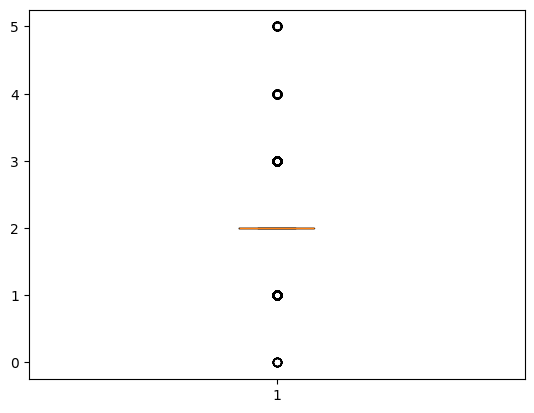

In [ ]:
#drawing BoxPlot
plt.boxplot(room)
plt.show()

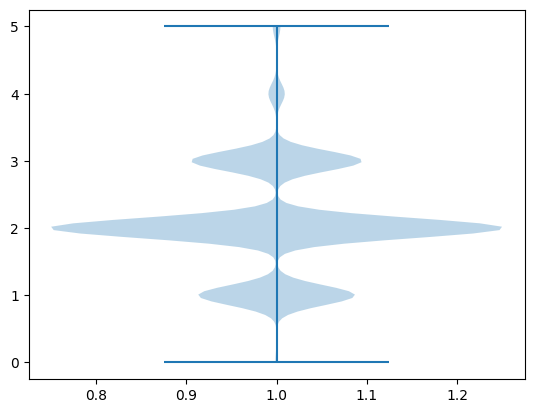

In [ ]:
#drawing violinplot
plt.violinplot(room)
plt.show()

## Price
### outlier mean

In [ ]:
#find outlier with mean
mean = price.mean()
std = price.std()
Upper_bond = mean + std * 3.5
Lower_bond = mean - std * 3.5
Outlier_mean = price[(price > Upper_bond) | (price < Lower_bond)]
outliers_index_mean = np.where((price > Upper_bond) | (price < Lower_bond))
print(dict(zip(Outlier_mean, outliers_index_mean)))

{np.int64(37800000000): array([ 200,  329,  339,  348,  412,  429,  430,  439,  458,  463,  496,
        514,  525,  559,  581,  813,  825,  873, 1002, 1018, 1019, 1111,
       1145, 1255, 1262, 1315, 1324, 1347, 1349, 1351, 1358, 1399, 1400,
       1407, 1417, 1418, 1419, 1420, 1480, 1543, 1557, 1625, 1684, 1697,
       1713, 1758, 1799, 1852, 2179, 2353, 2354, 2355, 2358, 2377, 2378,
       2675, 2688, 2830, 2940, 3030, 3086, 3090, 3162, 3232])}


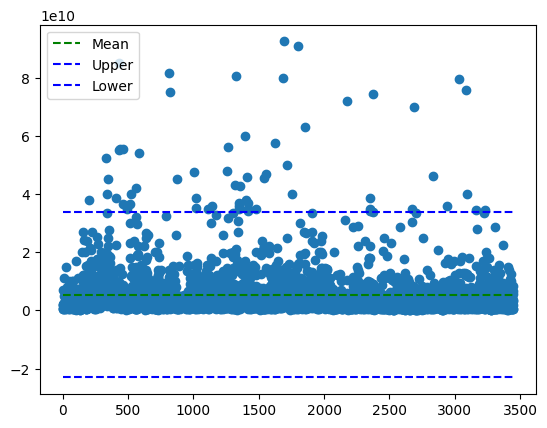

In [ ]:
# outlier Mean Plot
x = np.arange(len(price))
plt.scatter(x,price)
plt.plot([0, len(df)],[mean, mean], "g--", label="Mean")
plt.plot([0, len(df)],[mean + std * 3.5, mean + std * 3.5], "b--", label="Upper")
plt.plot([0, len(df)],[mean - std * 3.5, mean - std * 3.5], "b--", label="Lower")
plt.legend()
plt.show()

### IQR outlier

In [ ]:
# find outlier with IQR
Q1 = np.quantile(price, 0.25)
Q2 = np.quantile(price, 0.50)
Q3 = np.quantile(price, 0.75)
IQR = Q3 - Q1
upper_bond = Q3 + IQR * 3.5
lower_bond = Q1 - IQR * 3.5
Outlier_IQR = price[(price > Upper_bond) | (price < Lower_bond)]
outliers_index_IQR = np.where((price > Upper_bond) | (price < Lower_bond))
print(dict(zip(Outlier_IQR, outliers_index_IQR)))

{np.int64(37800000000): array([ 200,  329,  339,  348,  412,  429,  430,  439,  458,  463,  496,
        514,  525,  559,  581,  813,  825,  873, 1002, 1018, 1019, 1111,
       1145, 1255, 1262, 1315, 1324, 1347, 1349, 1351, 1358, 1399, 1400,
       1407, 1417, 1418, 1419, 1420, 1480, 1543, 1557, 1625, 1684, 1697,
       1713, 1758, 1799, 1852, 2179, 2353, 2354, 2355, 2358, 2377, 2378,
       2675, 2688, 2830, 2940, 3030, 3086, 3090, 3162, 3232])}


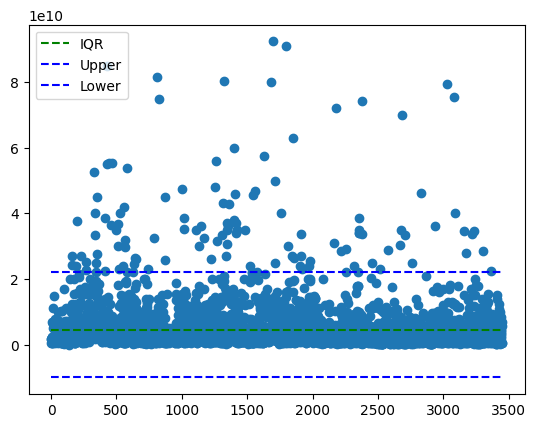

In [ ]:
# IQR plot
x = np.arange(len(price))
plt.scatter(x,price)
lower_bond = Q1 - IQR * 3.5
plt.plot([0, len(df)],[IQR, IQR], "g--", label="IQR")
plt.plot([0, len(df)],[Q3 + IQR * 3.5, Q3 + IQR * 3.5], "b--", label="Upper")
plt.plot([0, len(df)],[Q3 - IQR * 3.5, Q3 - IQR * 3.5], "b--", label="Lower")
plt.legend()
plt.show()

In [35]:
#find common outlier
ou = pd.DataFrame(np.c_[x,price], columns=["ID", "price"])
ou["Outlier_mean"] = 0
ou["Outlier_IQR"] = 1
ou.loc[outliers_index_mean, "Outlier_mean"] = 1
ou.loc[outliers_index_IQR, "Outlier_IQR"] = 1
ou["Outlier"] = (ou["Outlier_mean"] + ou["Outlier_IQR"]) /2
ou

ID       price  Outlier_mean  Outlier_IQR  Outlier
0        0  1850000000             0            1        0
1        1  1850000000             0            1        0
2        2   550000000             0            1        0
3        3   902500000             0            1        0
4        4  7000000000             0            1        0
...    ...         ...           ...          ...      ...
3445  3445  3500000000             0            1        0
3446  3446  6800000000             0            1        0
3447  3447   365000000             0            1        0
3448  3448  5600000000             0            1        0
3449  3449   360000000             0            1        0

[3450 rows x 5 columns]

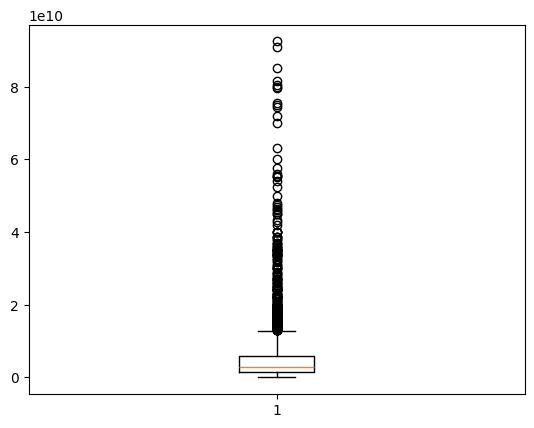

In [ ]:
#drawing BoxPlot
plt.boxplot(price)
plt.show()

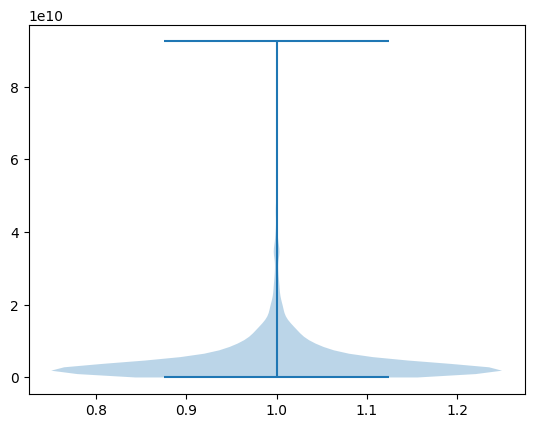

In [ ]:
#drawing violinplot
plt.violinplot(price)
plt.show()

### price(USD)
### outlier mean

In [ ]:
#find outlier with mean
mean = price.mean()
std = price.std()
Upper_bond = mean + std * 5
Lower_bond = mean - std * 5
Outlier_mean = price_usd[(price_usd > Upper_bond) | (price_usd < Lower_bond)]
outliers_index_mean = np.where((price_usd > Upper_bond) | (price_usd < Lower_bond))
print(dict(zip(Outlier_mean, outliers_index_mean)))

{}


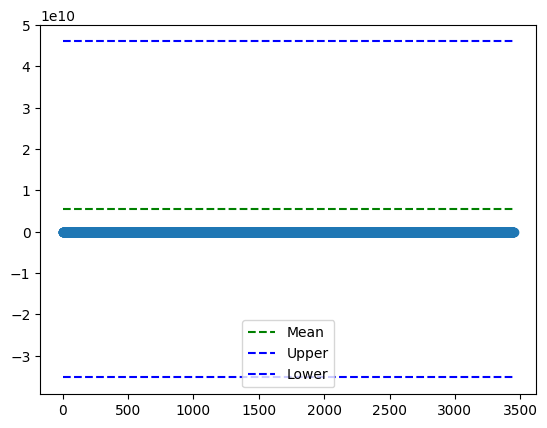

In [ ]:
# outlier Mean Plot
x = np.arange(len(price_usd))
plt.scatter(x,price_usd)
plt.plot([0, len(df)],[mean, mean], "g--", label="Mean")
plt.plot([0, len(df)],[mean + std * 5, mean + std * 5], "b--", label="Upper")
plt.plot([0, len(df)],[mean - std * 5, mean - std * 5], "b--", label="Lower")
plt.legend()
plt.show()

### IQR plot

In [ ]:
# find outlier with IQR
Q1 = np.quantile(price_usd, 0.25)
Q2 = np.quantile(price_usd, 0.50)
Q3 = np.quantile(price_usd, 0.75)
IQR = Q3 - Q1
upper_bond = Q3 + IQR * 5
lower_bond = Q1 - IQR * 5
Outlier_IQR = price_usd[(price_usd > Upper_bond) | (price_usd < Lower_bond)]
outliers_index_IQR = np.where((price_usd > Upper_bond) | (price_usd < Lower_bond))
print(dict(zip(Outlier_IQR, outliers_index_IQR)))

{}


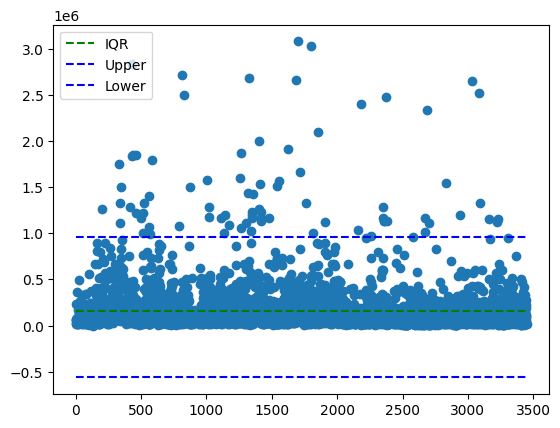

In [ ]:
# IQR plot
x = np.arange(len(price_usd))
plt.scatter(x,price_usd)
lower_bond = Q1 - IQR * 3.5
plt.plot([0, len(df)],[IQR, IQR], "g--", label="IQR")
plt.plot([0, len(df)],[Q3 + IQR * 5, Q3 + IQR * 5], "b--", label="Upper")
plt.plot([0, len(df)],[Q3 - IQR * 5, Q3 - IQR * 5], "b--", label="Lower")
plt.legend()
plt.show()

In [ ]:
#find common outlier
ou = pd.DataFrame(np.c_[x,price_usd], columns=["ID", "price_usd"])
ou["Outlier_mean"] = 0
ou["Outlier_IQR"] = 1
ou.loc[outliers_index_mean, "Outlier_mean"] = 1
ou.loc[outliers_index_IQR, "Outlier_IQR"] = 1
ou["Outlier"] = (ou["Outlier_mean"] + ou["Outlier_IQR"]) /2
ou

ID  price_usd  Outlier_mean  Outlier_IQR  Outlier
0       0      61667             0            1        0
1       1      61667             0            1        0
2       2      18333             0            1        0
3       3      30083             0            1        0
4       4     233333             0            1        0
...   ...        ...           ...          ...      ...
3445 3445     116667             0            1        0
3446 3446     226667             0            1        0
3447 3447      12167             0            1        0
3448 3448     186667             0            1        0
3449 3449      12000             0            1        0

[3450 rows x 5 columns]

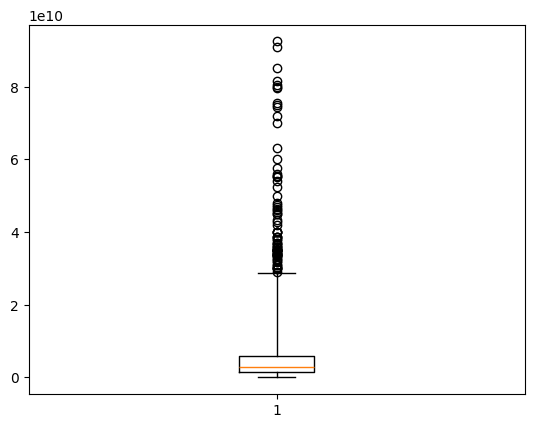

In [ ]:
# drawing BoxPlot
plt.boxplot(price, whis=5)
plt.show()

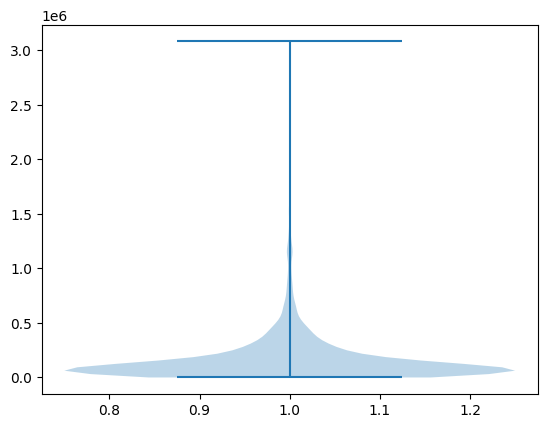

In [ ]:
#drawing violinplot
plt.violinplot(price_usd)
plt.show()

## find relation with pearson coefficient
### Area

In [37]:
#relative between Area and room
pearsonr(df["Area"],df["Room"])

PearsonRResult(statistic=np.float64(0.6729547679817094), pvalue=np.float64(0.0))

In [38]:
#relative between Area and Parking
pearsonr(df["Area"],df["Parking"])

PearsonRResult(statistic=np.float64(0.19789000078469635), pvalue=np.float64(8.390068148960996e-32))

In [39]:
#relative between Area and Warehouse
pearsonr(df["Area"],df["Warehouse"])

PearsonRResult(statistic=np.float64(0.07616056225922598), pvalue=np.float64(7.523831021357215e-06))

In [40]:
#relative between Area and Price
pearsonr(df["Area"],df["Price"])

PearsonRResult(statistic=np.float64(0.7226107335923829), pvalue=np.float64(0.0))

In [41]:
#relative between Area and Price(USD)
pearsonr(df["Area"],df["Price(USD)"])

PearsonRResult(statistic=np.float64(0.7226107334368046), pvalue=np.float64(0.0))

In [42]:
#relative between Area and Address
groups = [df.loc[df["Address"] == addr, "Area"] for addr in df["Address"].unique()]
f_stat, p_val =stats.f_oneway(*groups)
print(f_stat, p_val)

11.795147508171732 1.4377716160400586e-251


### Room

In [43]:
#relative between Room and Parking
pearsonr(df["Room"],df["Parking"])

PearsonRResult(statistic=np.float64(0.27442504207241947), pvalue=np.float64(1.178355534485526e-60))

In [44]:
#relative between Room and Warehouse
pearsonr(df["Room"],df["Warehouse"])

PearsonRResult(statistic=np.float64(0.12964929909672462), pvalue=np.float64(2.0943791011448637e-14))

In [45]:
#relative between Room and Price
pearsonr(df["Room"],df["Price"])

PearsonRResult(statistic=np.float64(0.567872062527608), pvalue=np.float64(7.758975644829404e-294))

In [46]:
#relative between Room and Elevator
pearsonr(df["Room"],df["Elevator"])

PearsonRResult(statistic=np.float64(0.18037954660238914), pvalue=np.float64(1.2796356315308086e-26))

In [47]:
#relative between Room and Price(USD)
pearsonr(df["Room"],df["Price(USD)"])

PearsonRResult(statistic=np.float64(0.5678720624596536), pvalue=np.float64(7.758977169514807e-294))

In [48]:
#relative between Area and Address
groups = [df.loc[df["Address"] == addr, "Room"] for addr in df["Address"].unique()]
f_stat, p_val =stats.f_oneway(*groups)
print(f_stat, p_val)

7.0534364652671915 2.928533290370111e-138


### Parking

In [49]:
#relative between Parking and Warehouse
pearsonr(df["Parking"],df["Warehouse"])

PearsonRResult(statistic=np.float64(0.4319246832279678), pvalue=np.float64(7.931532652996873e-157))

In [50]:
#relative between Parking and Price
pearsonr(df["Parking"],df["Price"])

PearsonRResult(statistic=np.float64(0.19122126357011435), pvalue=np.float64(9.072770563892551e-30))

In [51]:
#relative between Parking and Price(USD)
pearsonr(df["Parking"],df["Price(USD)"])

PearsonRResult(statistic=np.float64(0.19122126324910224), pvalue=np.float64(9.072772572053536e-30))

In [52]:
#relative between parking and Address
groups = [df.loc[df["Address"] == addr, "Parking"] for addr in df["Address"].unique()]
f_stat, p_val =stats.f_oneway(*groups)
print(f_stat, p_val)

7.8301787141517245 1.033271775728802e-157


### Price

In [53]:
#relative between Price and Price(USD)
pearsonr(df["Price"],df["Price(USD)"])

PearsonRResult(statistic=np.float64(0.9999999999999999), pvalue=np.float64(0.0))

In [54]:
#relative between price and Address
groups = [df.loc[df["Address"] == addr, "Price"] for addr in df["Address"].unique()]
f_stat, p_val =stats.f_oneway(*groups)
print(f_stat, p_val)

17.67928933810297 0.0


### Price(USD)

In [55]:
#relative between Price(USD) and Address
groups = [df.loc[df["Address"] == addr, "Price(USD)"] for addr in df["Address"].unique()]
f_stat, p_val =stats.f_oneway(*groups)
print(f_stat, p_val)

17.67928932389602 0.0


## Correlation

In [56]:
# we need to change Address to integer beacuse correlation work on integer
le = LabelEncoder()
df["Address_Encoder"] = le.fit_transform(df["Address"])
print(df)

      Area  Room  Parking  Warehouse  Elevator             Address  \
0       63     1        1          1         1             Shahran   
1       60     1        1          1         1             Shahran   
2       79     2        1          1         1              Pardis   
3       95     2        1          1         1       Shahrake Qods   
4      123     2        1          1         1      Shahrake Gharb   
...    ...   ...      ...        ...       ...                 ...   
3474    86     2        1          1         1  Southern Janatabad   
3475    83     2        1          1         1            Niavaran   
3476    75     2        0          0         0              Parand   
3477   105     2        1          1         1              Dorous   
3478    82     2        0          1         1              Parand   

           Price  Price(USD)  Address_Encoder  
0     1850000000       61667              156  
1     1850000000       61667              156  
2      55000000

In [ ]:
df.corr(numeric_only=True)

Area  Room  Parking  Warehouse  Elevator  Price  Price(USD)  \
Area                1     1        0          0         0      1           1   
Room                1     1        0          0         0      1           1   
Parking             0     0        1          0         0      0           0   
Warehouse           0     0        0          1         0      0           0   
Elevator            0     0        0          0         1      0           0   
Price               1     1        0          0         0      1           1   
Price(USD)          1     1        0          0         0      1           1   
Address_Encoder    -0    -0        0          0         0     -0          -0   

                 Address_Encoder  
Area                          -0  
Room                          -0  
Parking                        0  
Warehouse                      0  
Elevator                       0  
Price                         -0  
Price(USD)                    -0  
Address_Encoder                1

# Totall plot

<Axes: >

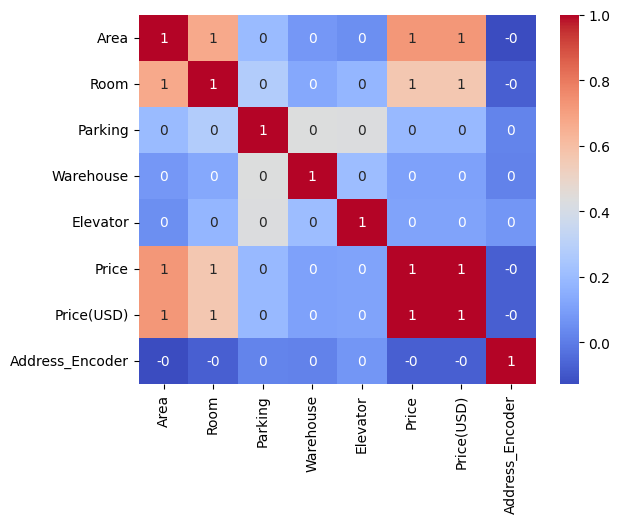

In [ ]:
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".0f", cmap="coolwarm")

# relation plot based on correlation
### Area

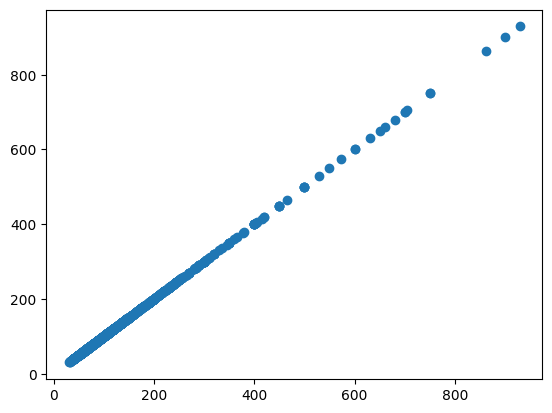

In [ ]:
plt.scatter(df["Area"],df["Area"])
plt.show()

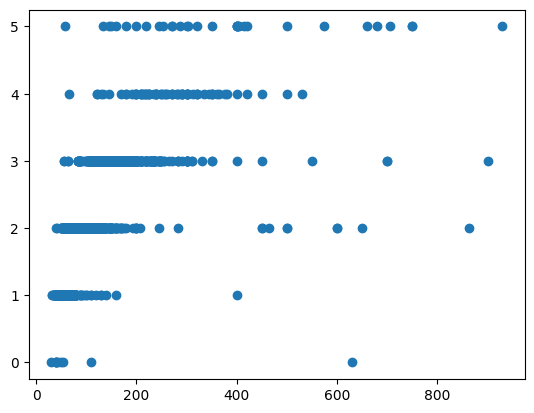

In [ ]:
plt.scatter(df["Area"], df["Room"])
plt.show()

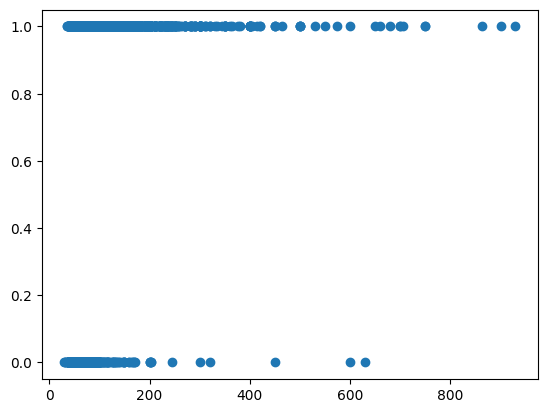

In [ ]:
plt.scatter(df["Area"],df["Parking"])
plt.show()

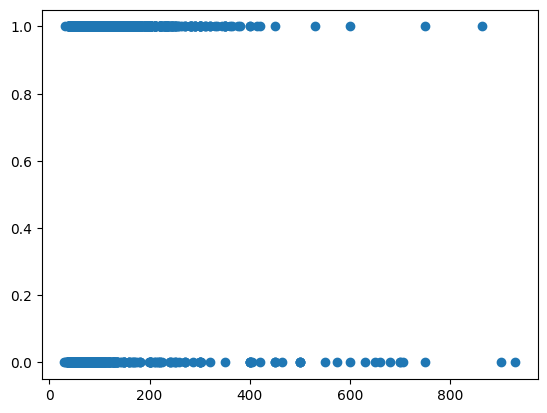

In [ ]:
plt.scatter(df["Area"], df["Elevator"])

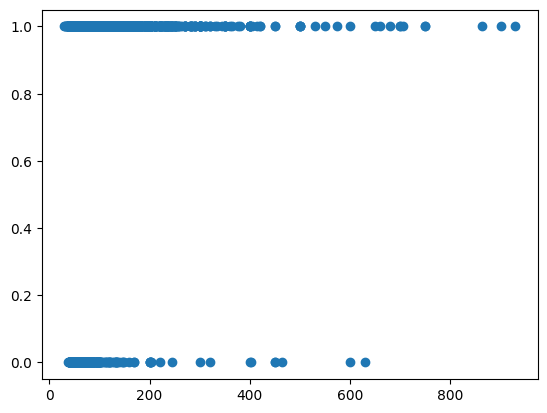

In [ ]:
plt.scatter(df["Area"], df["Warehouse"])

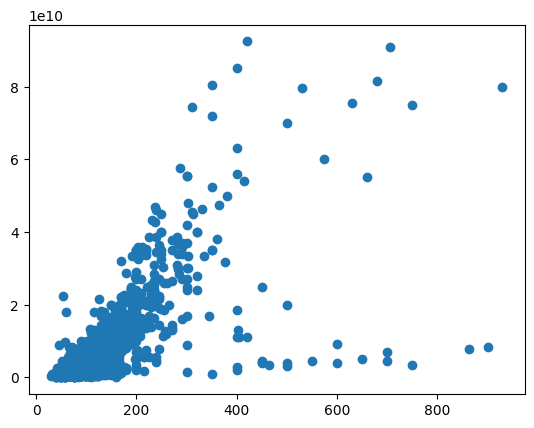

In [ ]:
plt.scatter(df["Area"], df["Price"])

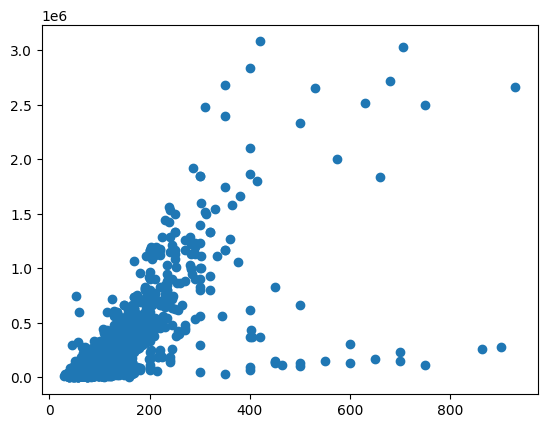

In [ ]:
plt.scatter(df["Area"], df["Price(USD)"])

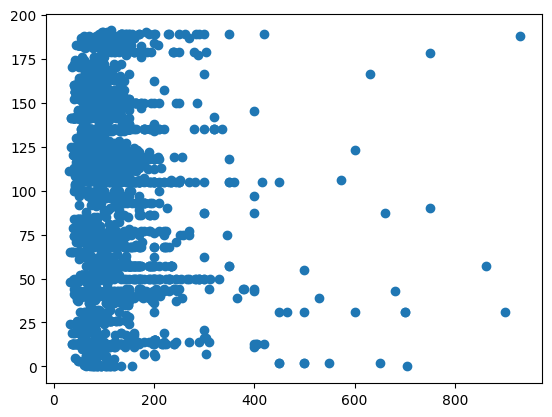

In [ ]:
plt.scatter(df["Area"], df["Address_Encoder"])

### Room

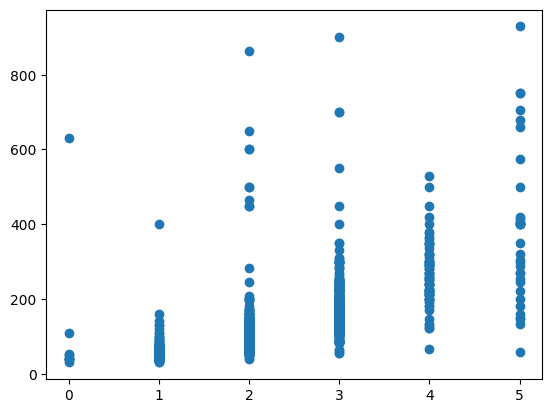

In [107]:
plt.scatter(df["Room"], df["Area"])

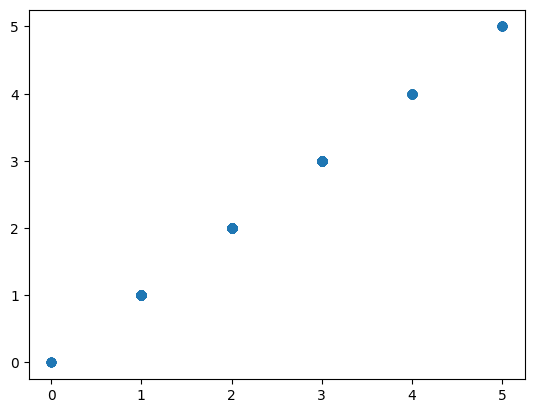

In [108]:
plt.scatter(df["Room"], df["Room"])

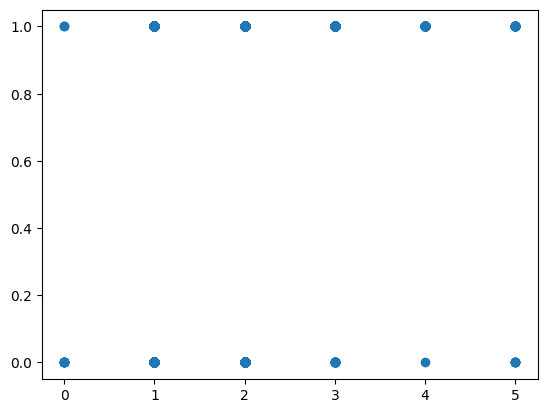

In [109]:
plt.scatter(df["Room"], df["Parking"])

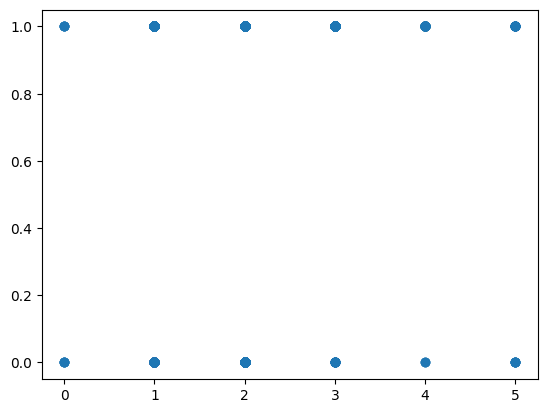

In [110]:
plt.scatter(df["Room"], df["Warehouse"])

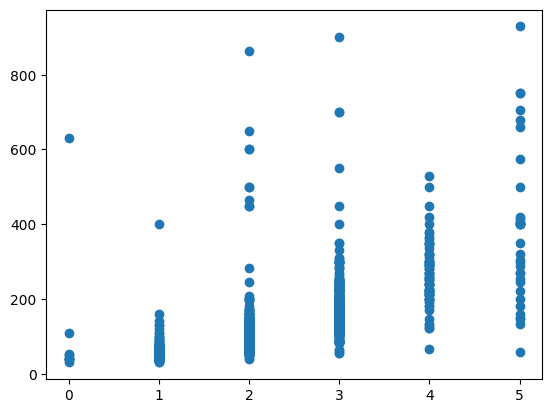

In [111]:
plt.scatter(df["Room"], df["Area"])

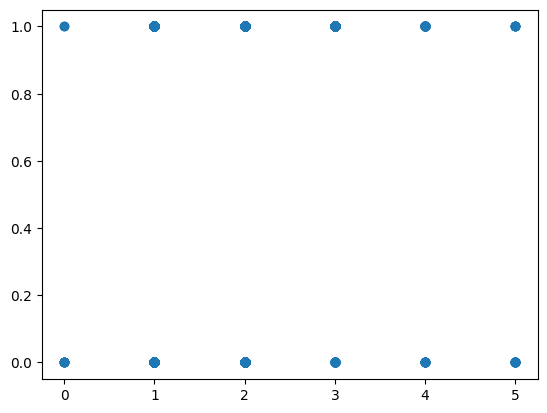

In [112]:
plt.scatter(df["Room"], df["Elevator"])

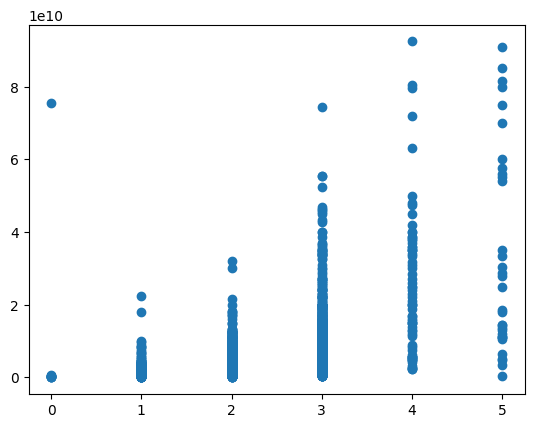

In [113]:
plt.scatter(df["Room"], df["Price"])

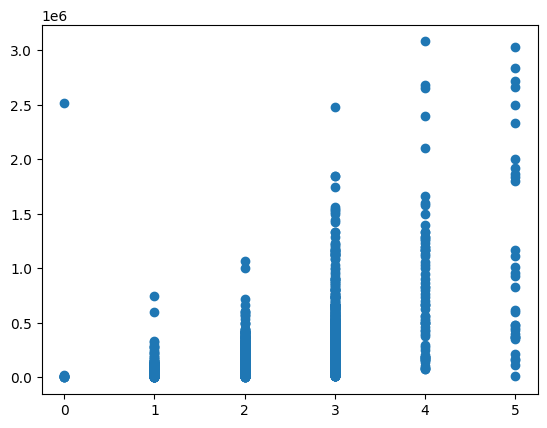

In [57]:
plt.scatter(df["Room"], df["Price(USD)"])

### Parking

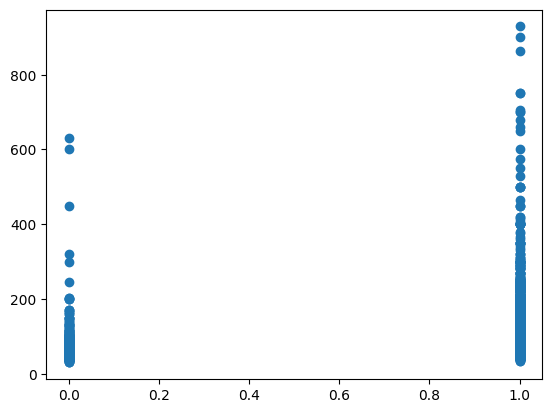

In [58]:
plt.scatter(df["Parking"], df["Area"])

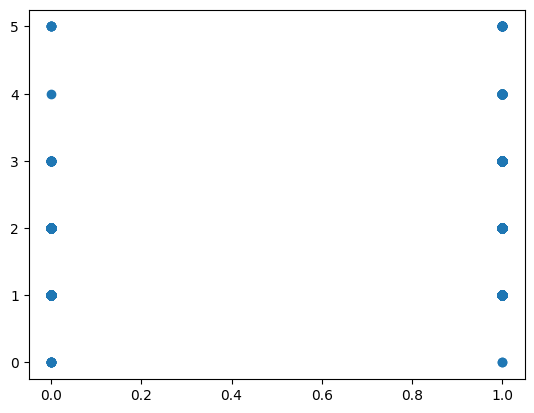

In [59]:
plt.scatter(df["Parking"], df["Room"])

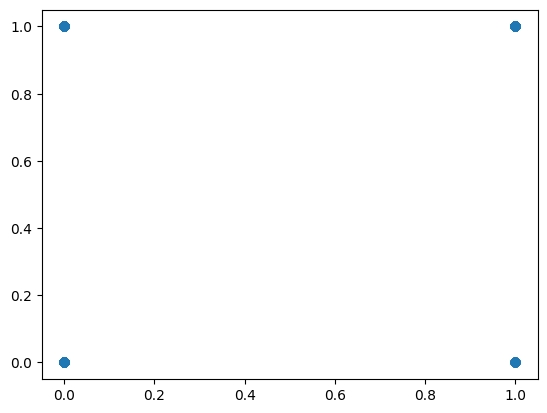

In [60]:
plt.scatter(df["Parking"], df["Warehouse"])

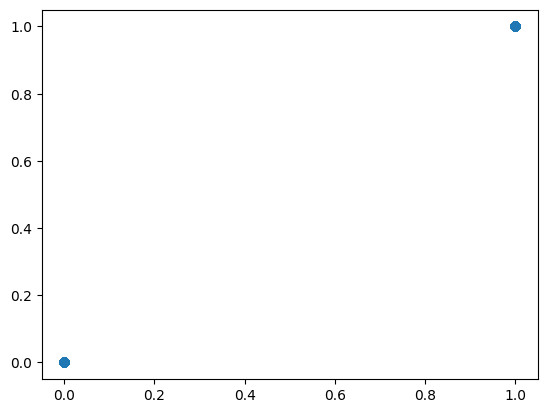

In [120]:
plt.scatter(df["Parking"], df["Parking"])

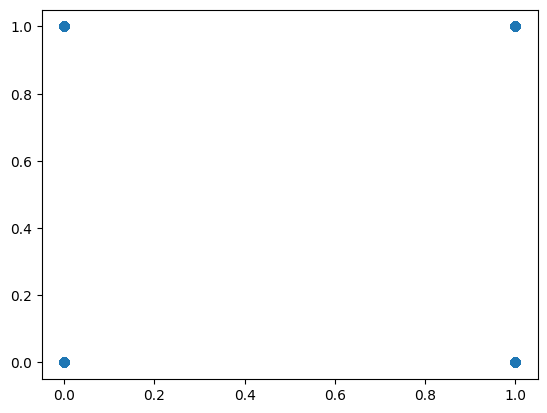

In [121]:
plt.scatter(df["Parking"], df["Elevator"])

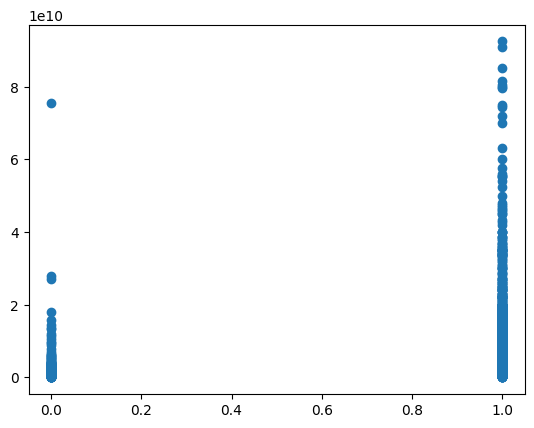

In [122]:
plt.scatter(df["Parking"], df["Price"])

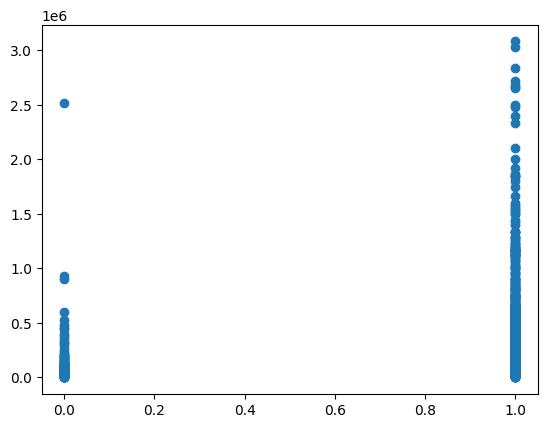

In [123]:
plt.scatter(df["Parking"], df["Price(USD)"])

### Warehouse

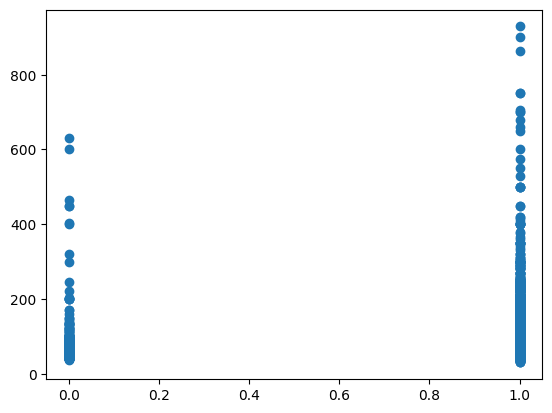

In [125]:
plt.scatter(df["Warehouse"], df["Area"])

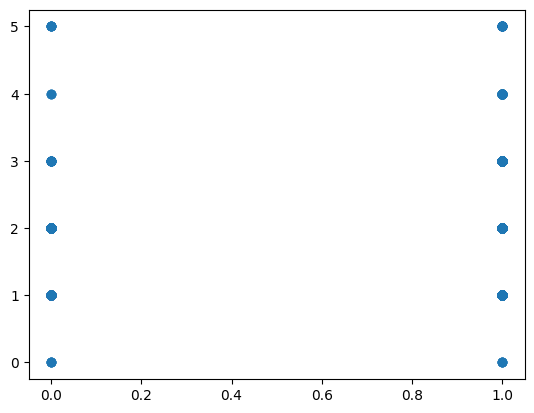

In [127]:
plt.scatter(df["Warehouse"], df["Room"])

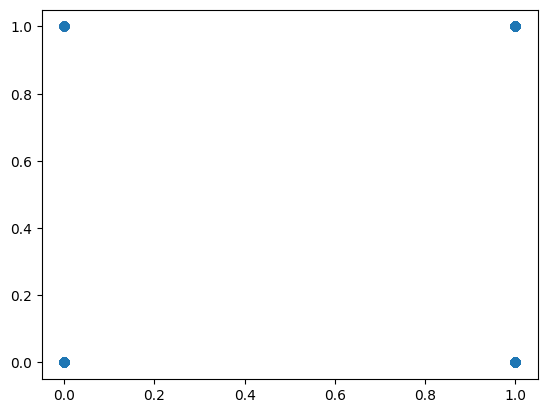

In [126]:
plt.scatter(df["Warehouse"], df["Parking"])

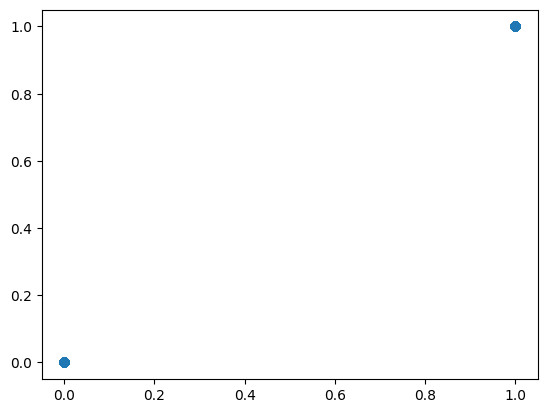

In [128]:
plt.scatter(df["Warehouse"], df["Warehouse"])

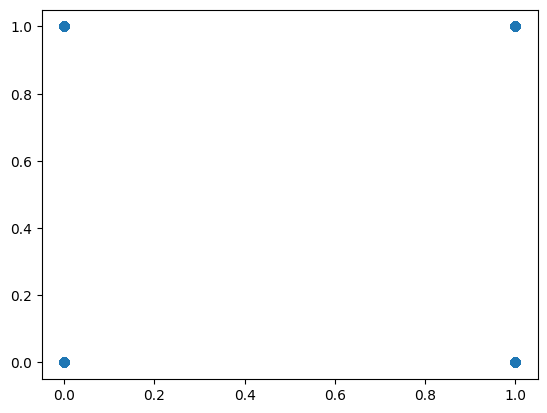

In [129]:
plt.scatter(df["Warehouse"], df["Elevator"])

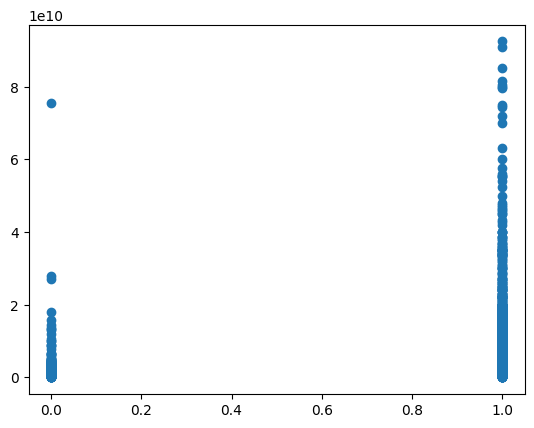

In [130]:
plt.scatter(df["Warehouse"], df["Price"])

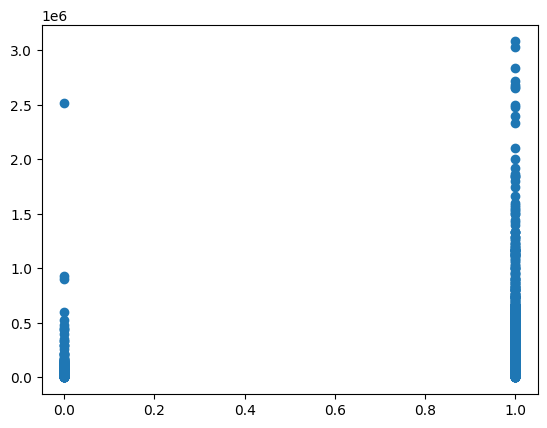

In [131]:
plt.scatter(df["Warehouse"], df["Price(USD)"])

### Elevator

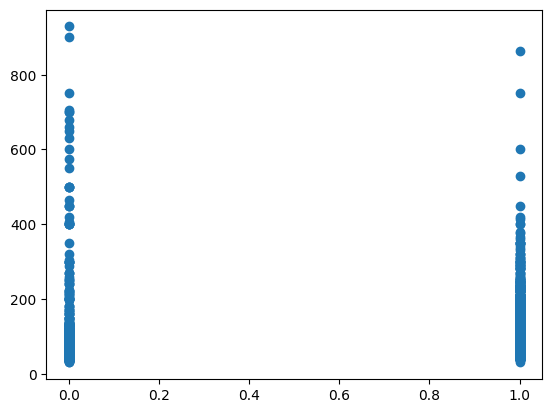

In [61]:
plt.scatter(df["Elevator"], df["Area"])

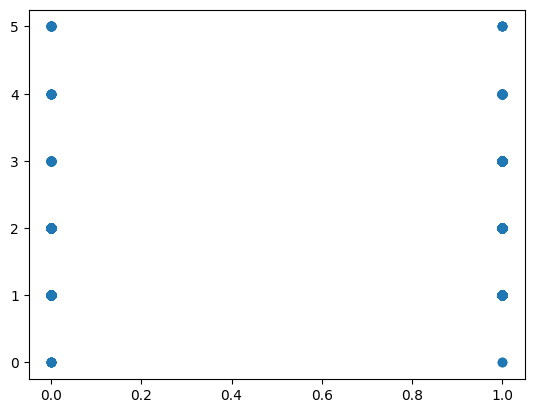

In [62]:
plt.scatter(df["Elevator"], df["Room"])

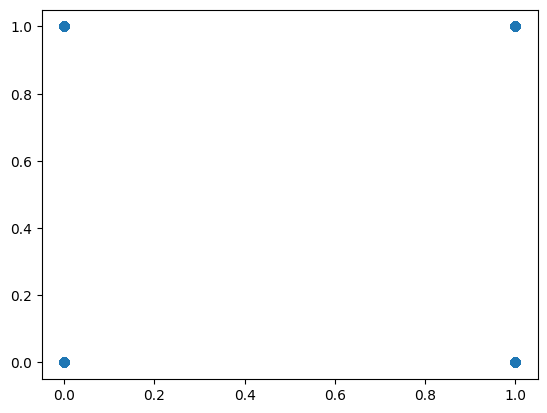

In [63]:
plt.scatter(df["Elevator"], df["Warehouse"])

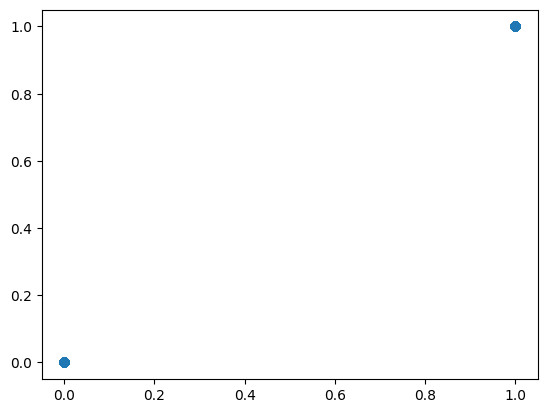

In [64]:
plt.scatter(df["Elevator"], df["Elevator"])

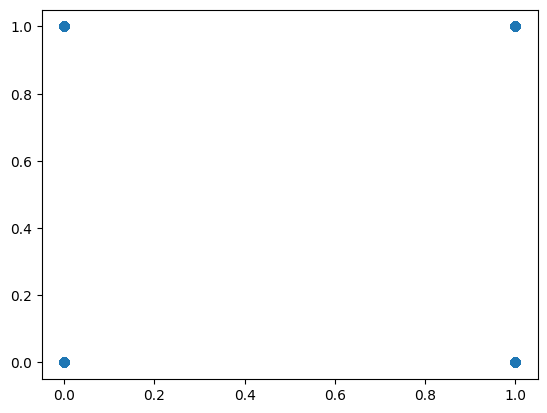

In [65]:
plt.scatter(df["Elevator"], df["Parking"])

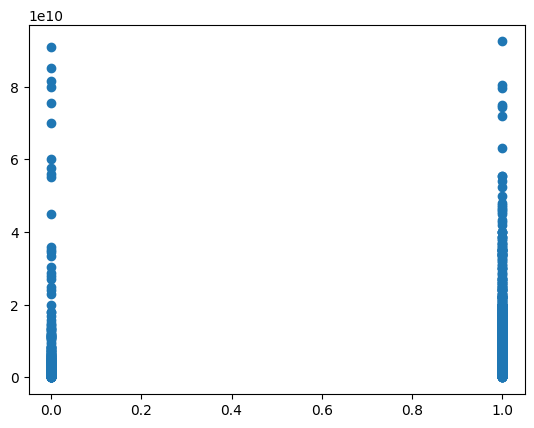

In [66]:
plt.scatter(df["Elevator"], df["Price"])

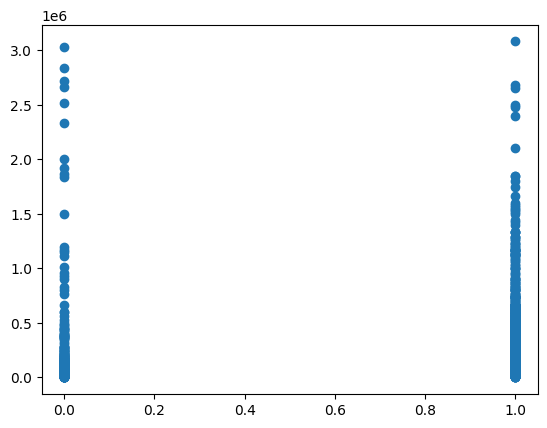

In [67]:
plt.scatter(df["Elevator"], df["Price(USD)"])

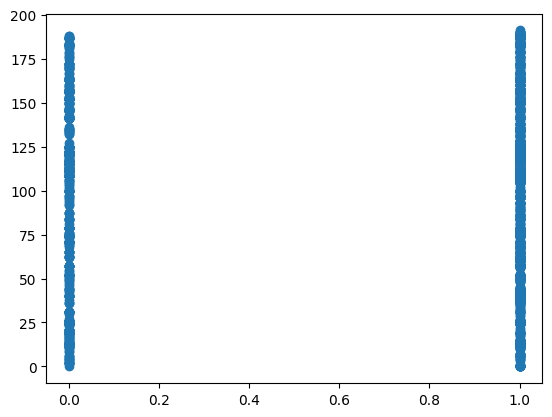

In [68]:
plt.scatter(df["Elevator"], df["Address_Encoder"])

### Address

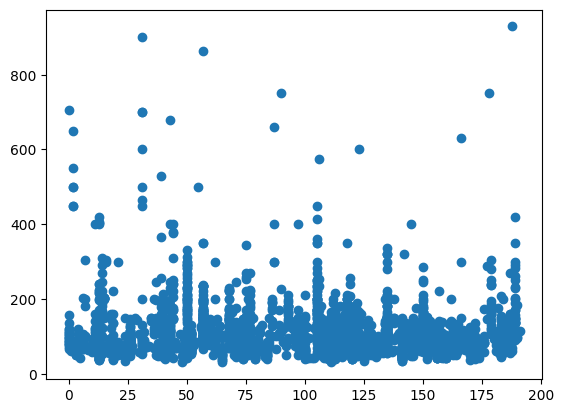

In [69]:
plt.scatter(df["Address_Encoder"], df["Area"])

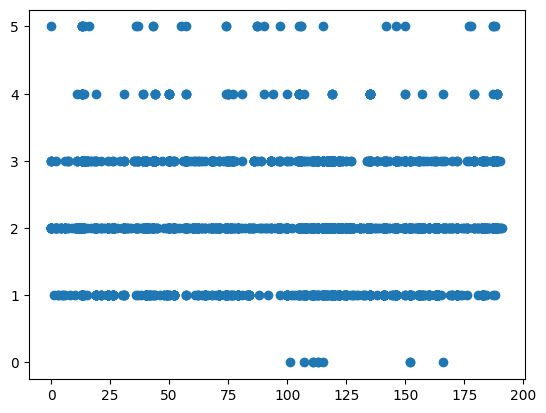

In [70]:
plt.scatter(df["Address_Encoder"], df["Room"])

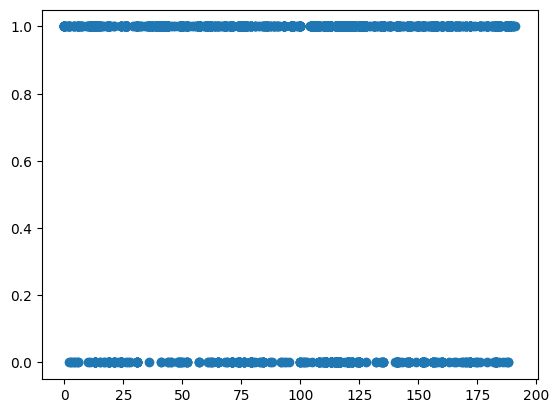

In [71]:
plt.scatter(df["Address_Encoder"], df["Parking"])

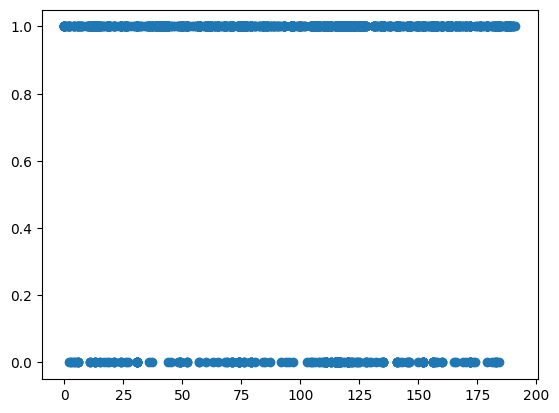

In [72]:
plt.scatter(df["Address_Encoder"], df["Warehouse"])

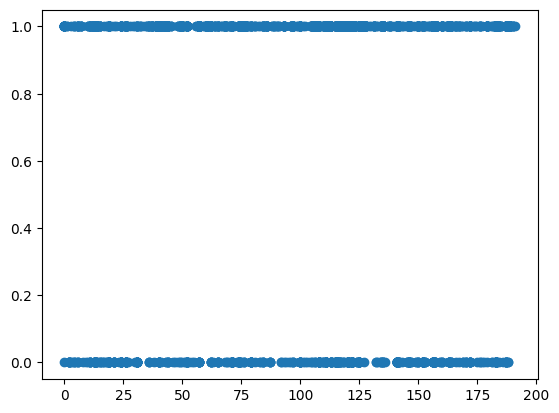

In [73]:
plt.scatter(df["Address_Encoder"], df["Elevator"])

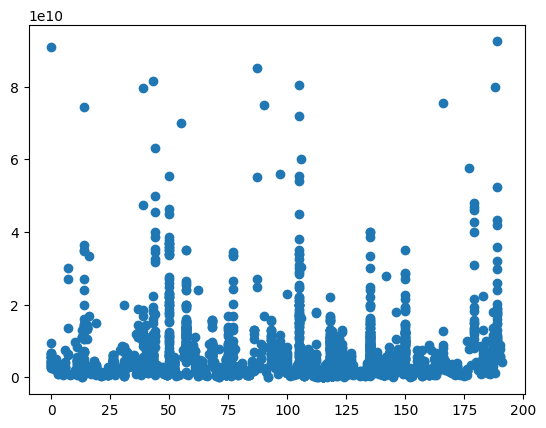

In [74]:
plt.scatter(df["Address_Encoder"], df["Price"])

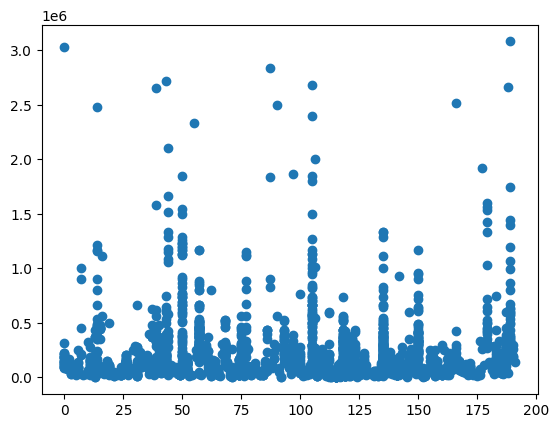

In [75]:
plt.scatter(df["Address_Encoder"], df["Price(USD)"])

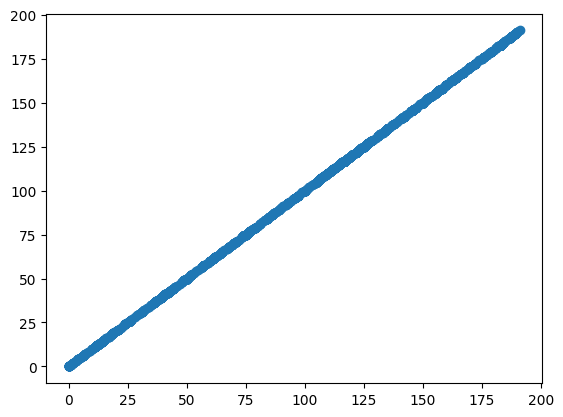

In [76]:
plt.scatter(df["Address_Encoder"], df["Address_Encoder"])

### Price

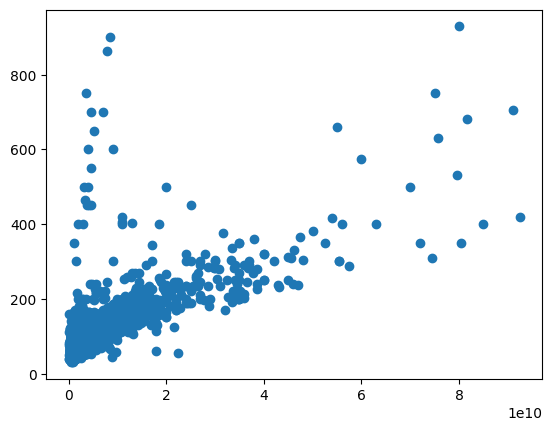

In [77]:
plt.scatter(df["Price"], df["Area"])

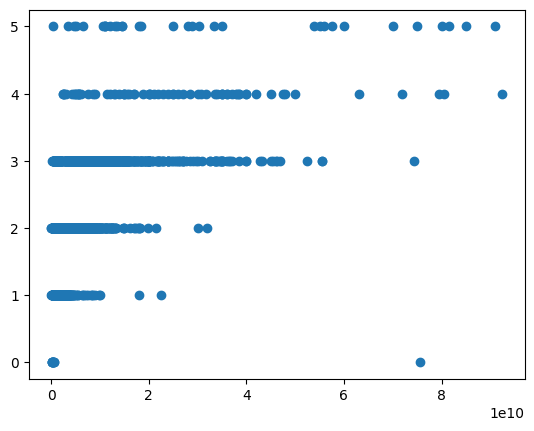

In [78]:
plt.scatter(df["Price"], df["Room"])

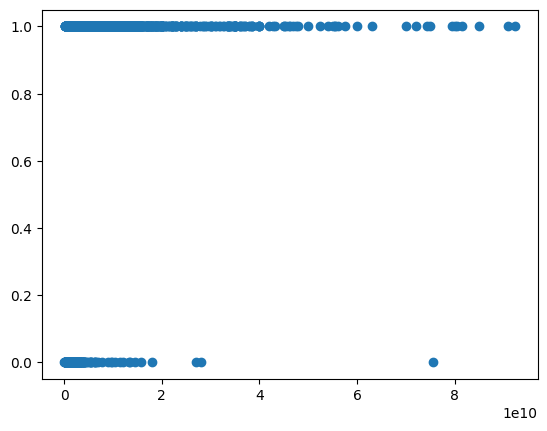

In [79]:
plt.scatter(df["Price"], df["Parking"])

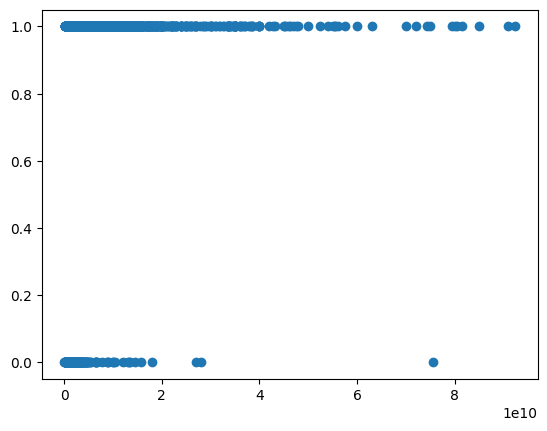

In [80]:
plt.scatter(df["Price"], df["Warehouse"])

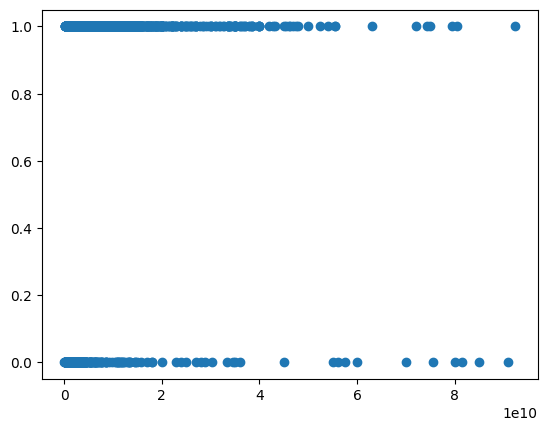

In [81]:
plt.scatter(df["Price"], df["Elevator"])

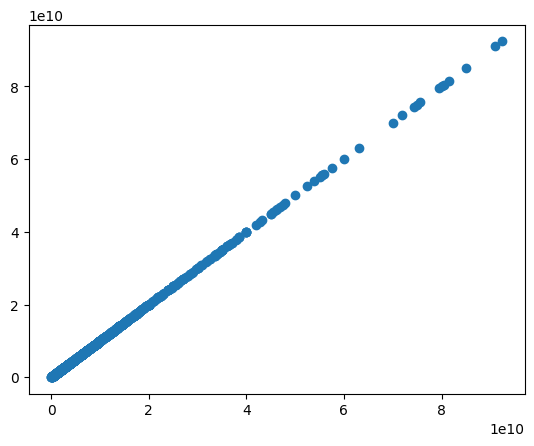

In [82]:
plt.scatter(df["Price"], df["Price"])

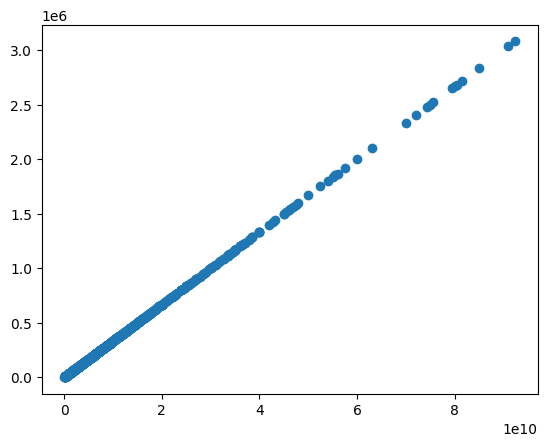

In [83]:
plt.scatter(df["Price"], df["Price(USD)"])

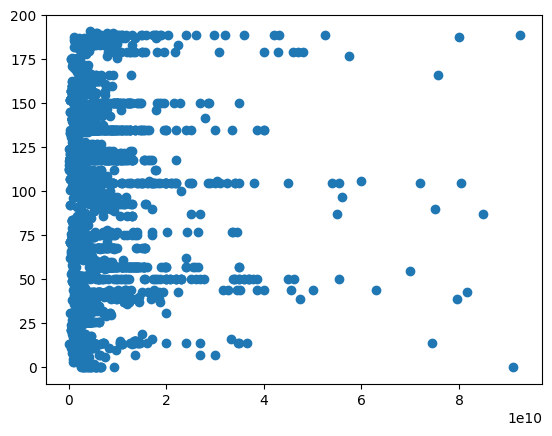

In [84]:
plt.scatter(df["Price"], df["Address_Encoder"])

### Price(USD)

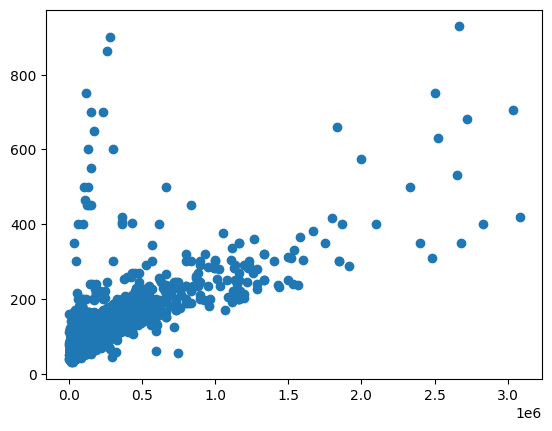

In [85]:
plt.scatter(df["Price(USD)"],df["Area"])

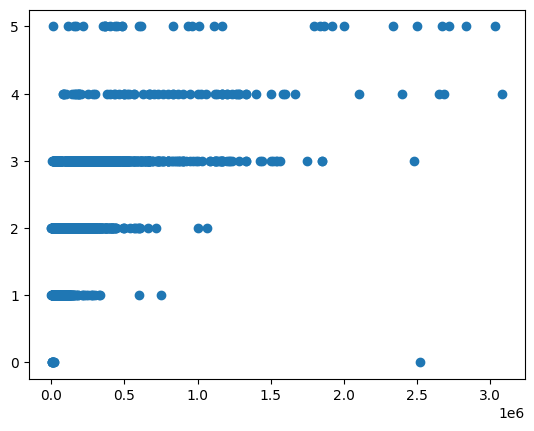

In [86]:
plt.scatter(df["Price(USD)"],df["Room"])

In [ ]:
plt.scatter(df["Price(USD)"],df["Parking"])

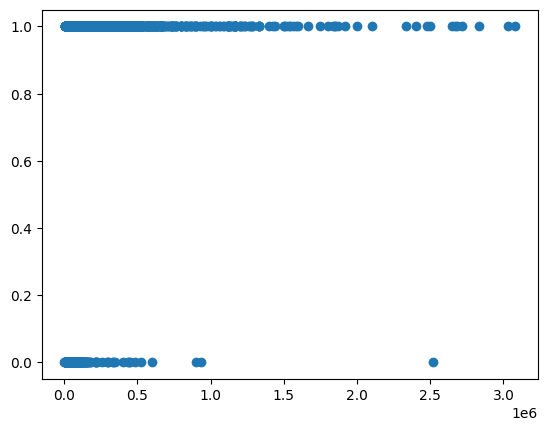

In [87]:
plt.scatter(df["Price(USD)"],df["Warehouse"])

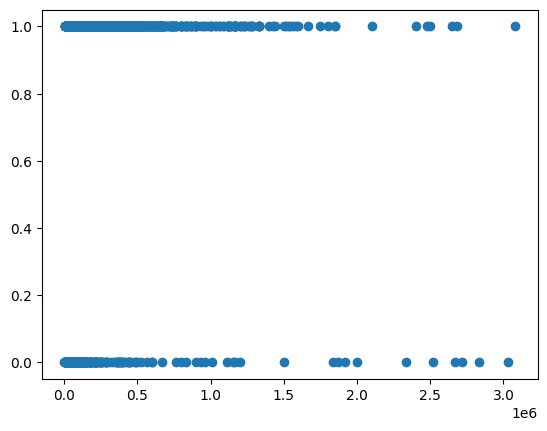

In [88]:
plt.scatter(df["Price(USD)"],df["Elevator"])

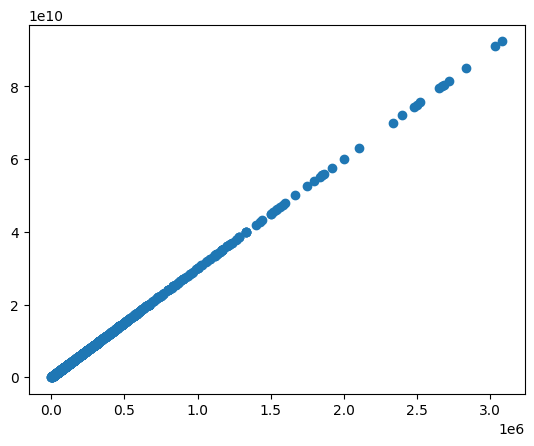

In [89]:
plt.scatter(df["Price(USD)"],df["Price"])

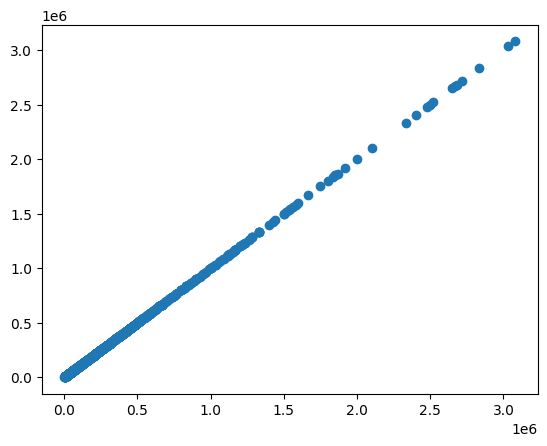

In [90]:
plt.scatter(df["Price(USD)"],df["Price(USD)"])

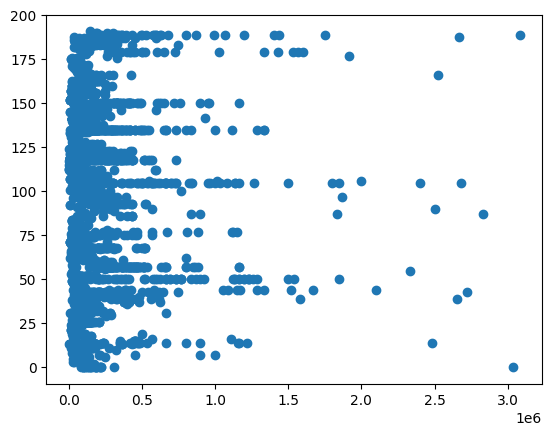

In [91]:
plt.scatter(df["Price(USD)"],df["Address_Encoder"])

### Address

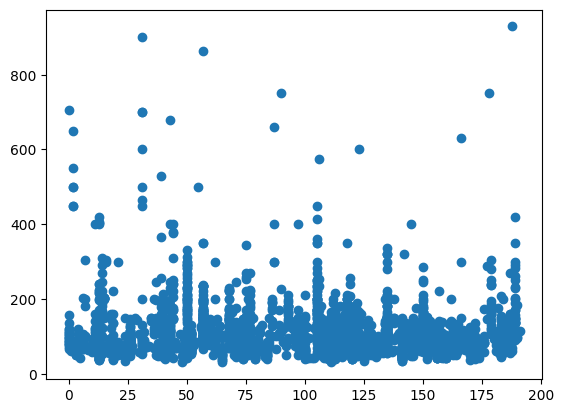

In [92]:
plt.scatter(df["Address_Encoder"], df["Area"])

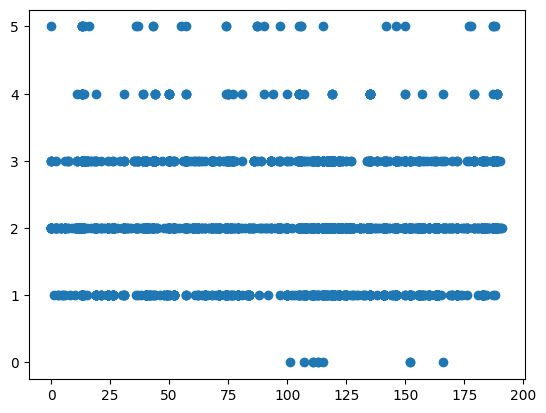

In [93]:
plt.scatter(df["Address_Encoder"], df["Room"])

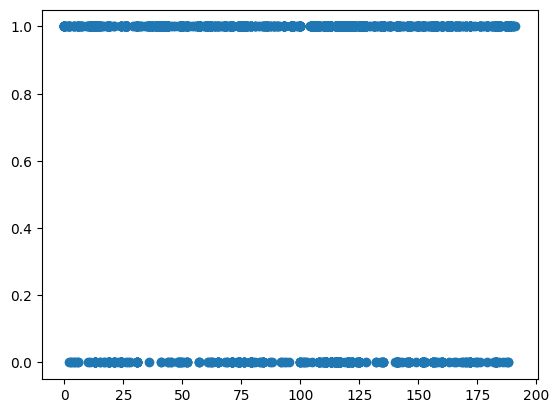

In [94]:
plt.scatter(df["Address_Encoder"], df["Parking"])

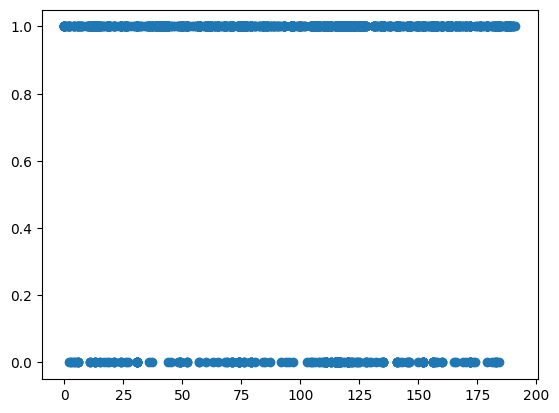

In [95]:
plt.scatter(df["Address_Encoder"], df["Warehouse"])

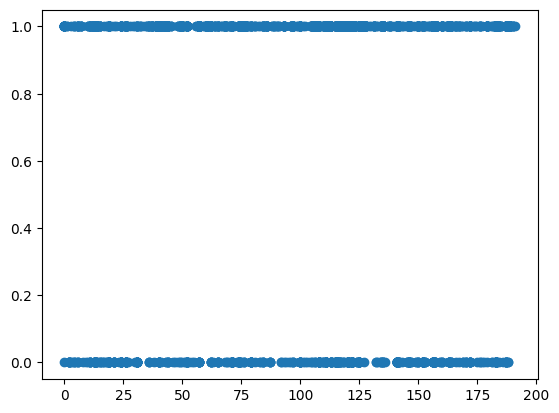

In [96]:
plt.scatter(df["Address_Encoder"], df["Elevator"])

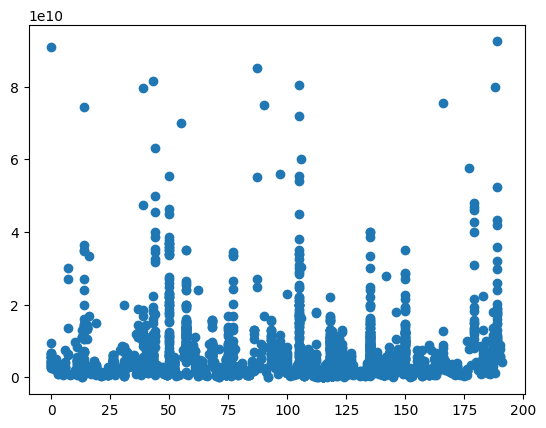

In [97]:
plt.scatter(df["Address_Encoder"], df["Price"])

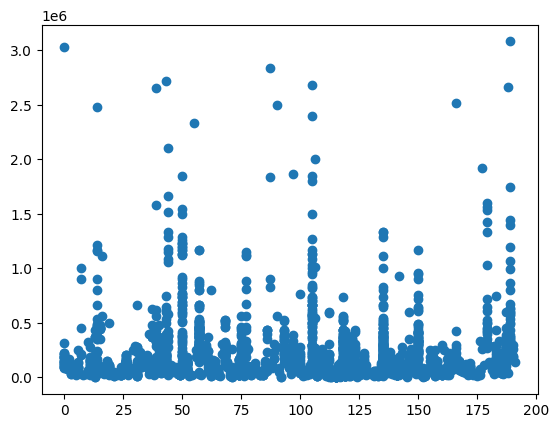

In [98]:
plt.scatter(df["Address_Encoder"], df["Price(USD)"])

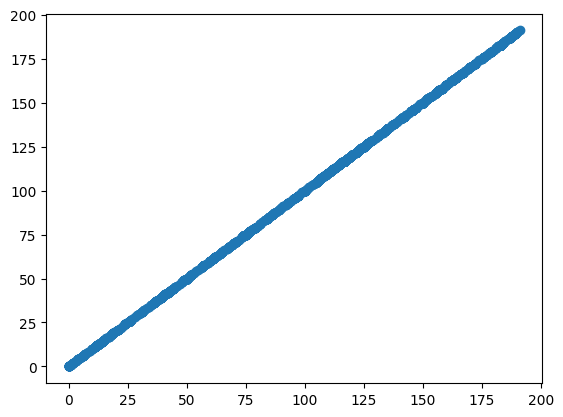

In [99]:
plt.scatter(df["Address_Encoder"], df["Address_Encoder"])

# Exploratory Data Analyois
## PairPlot

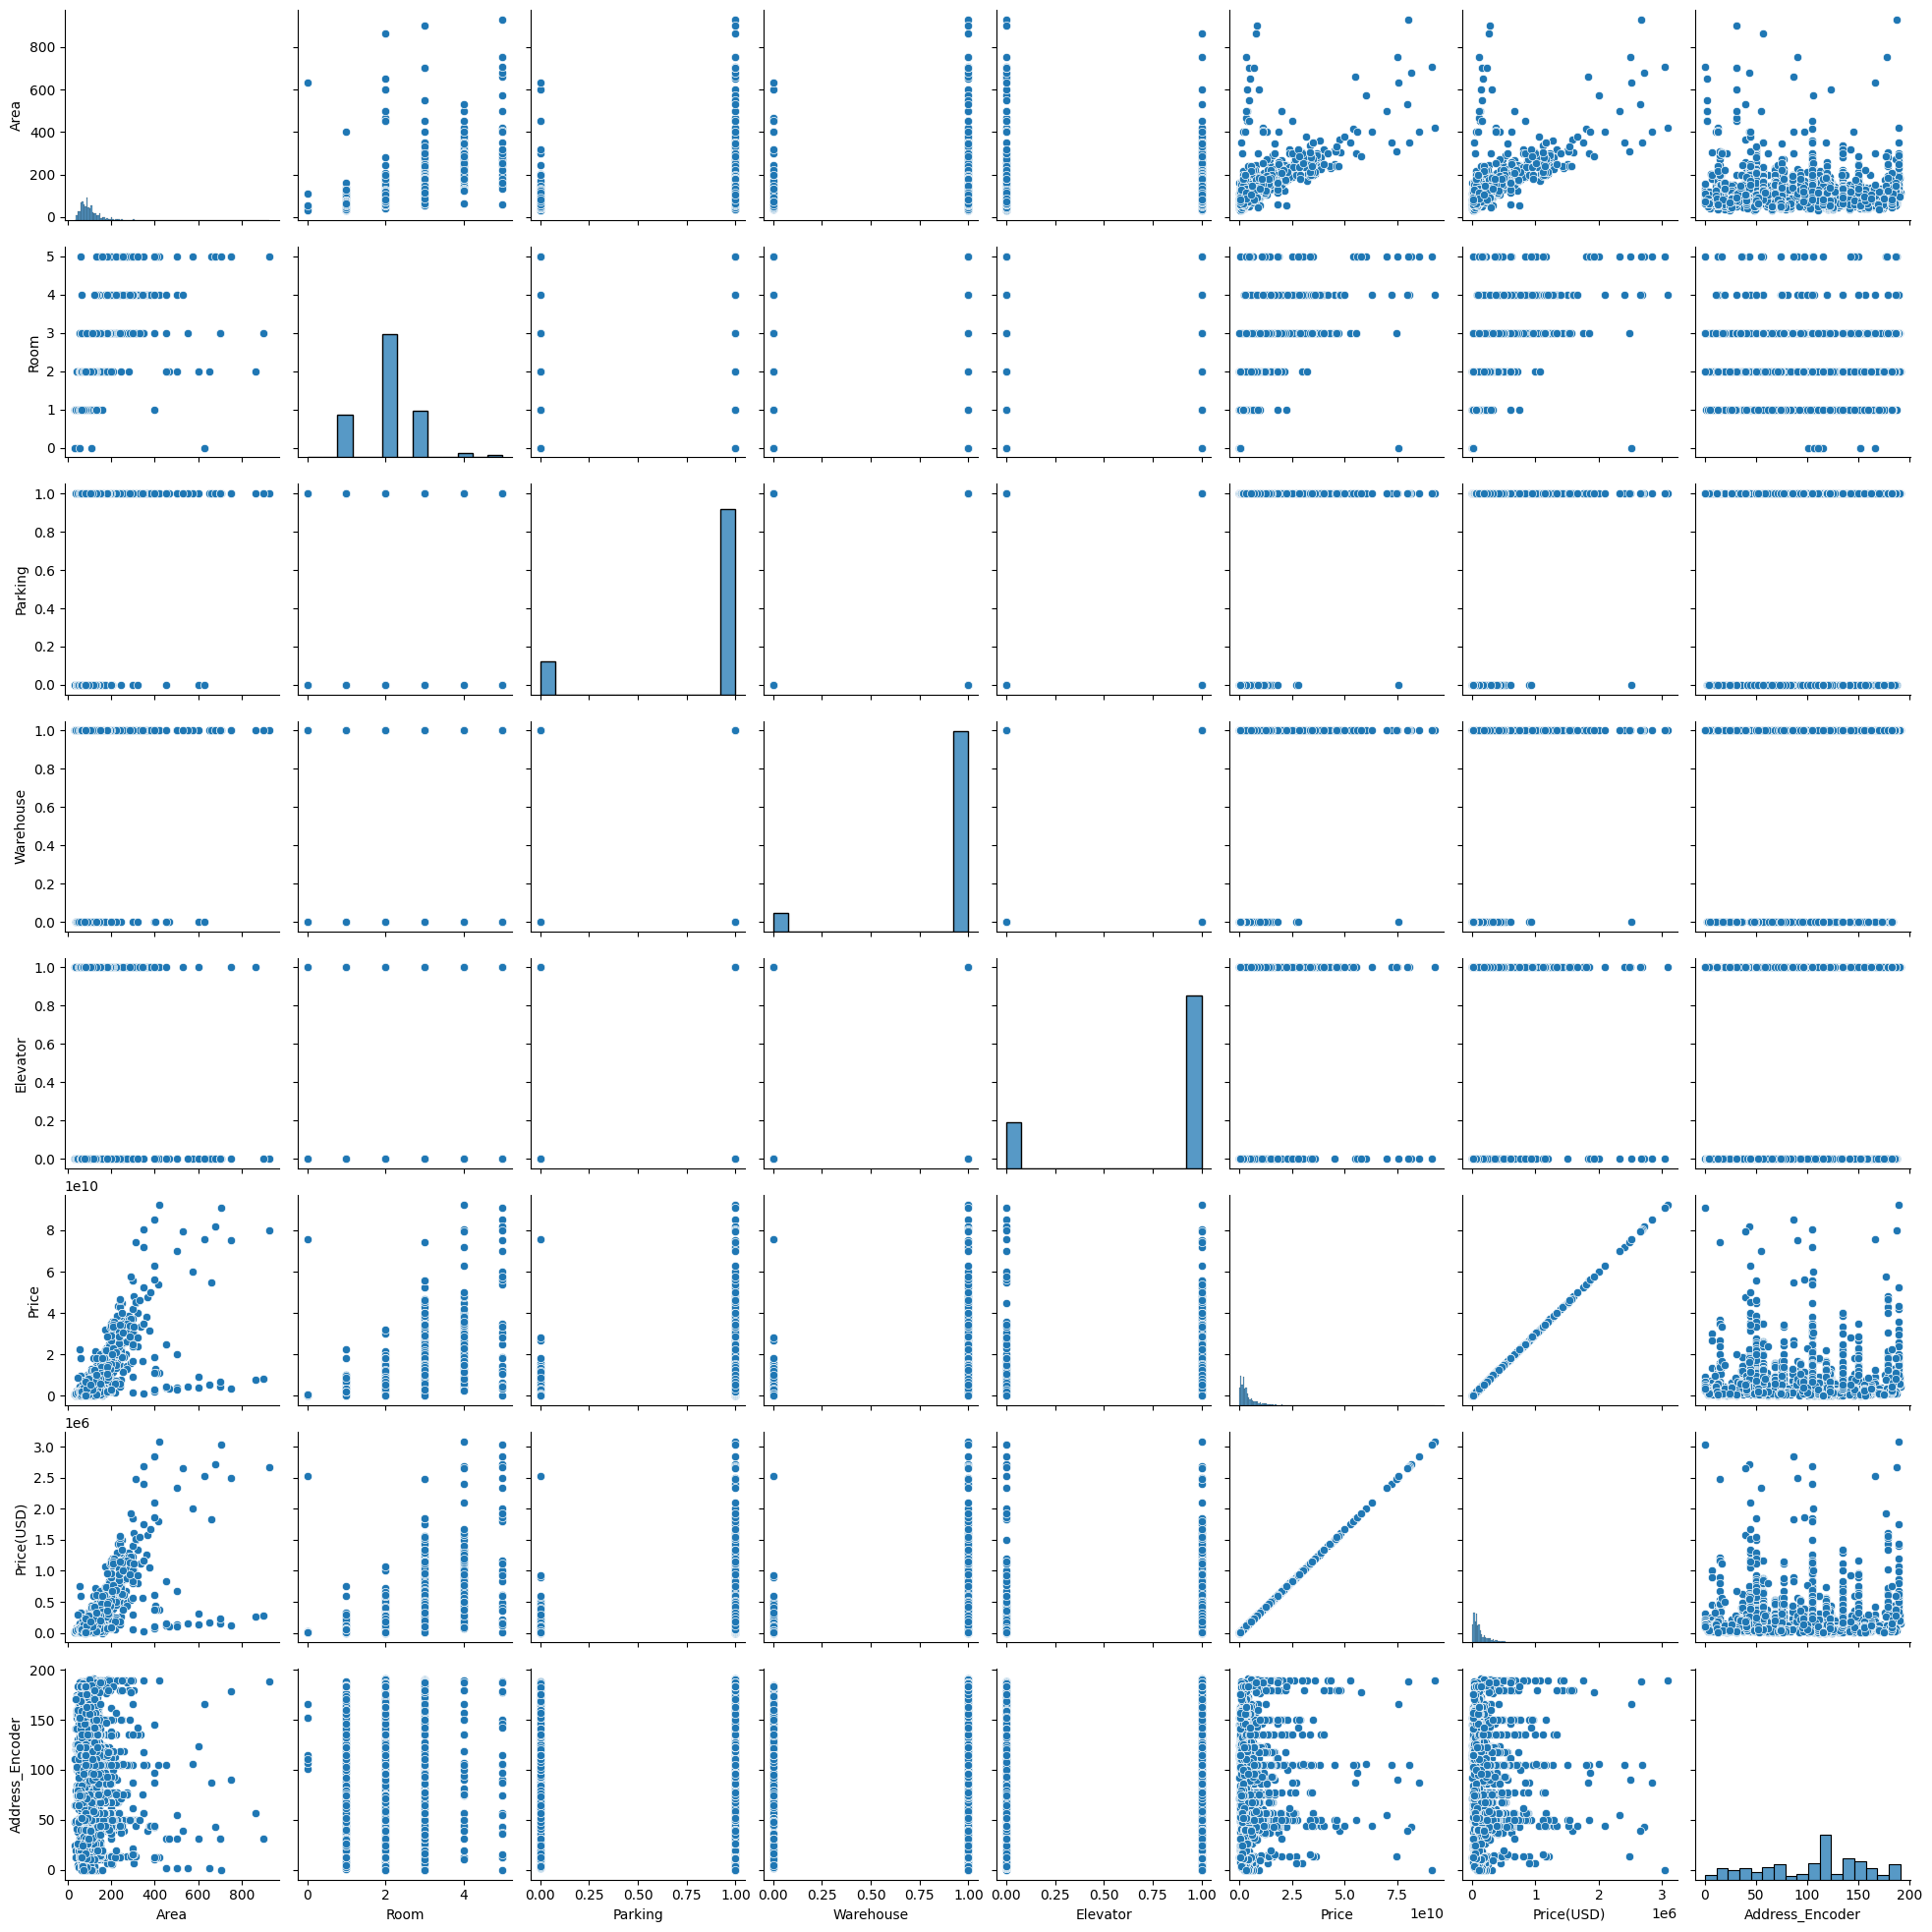

In [ ]:
sns.pairplot(df)

## compare plots
### Area

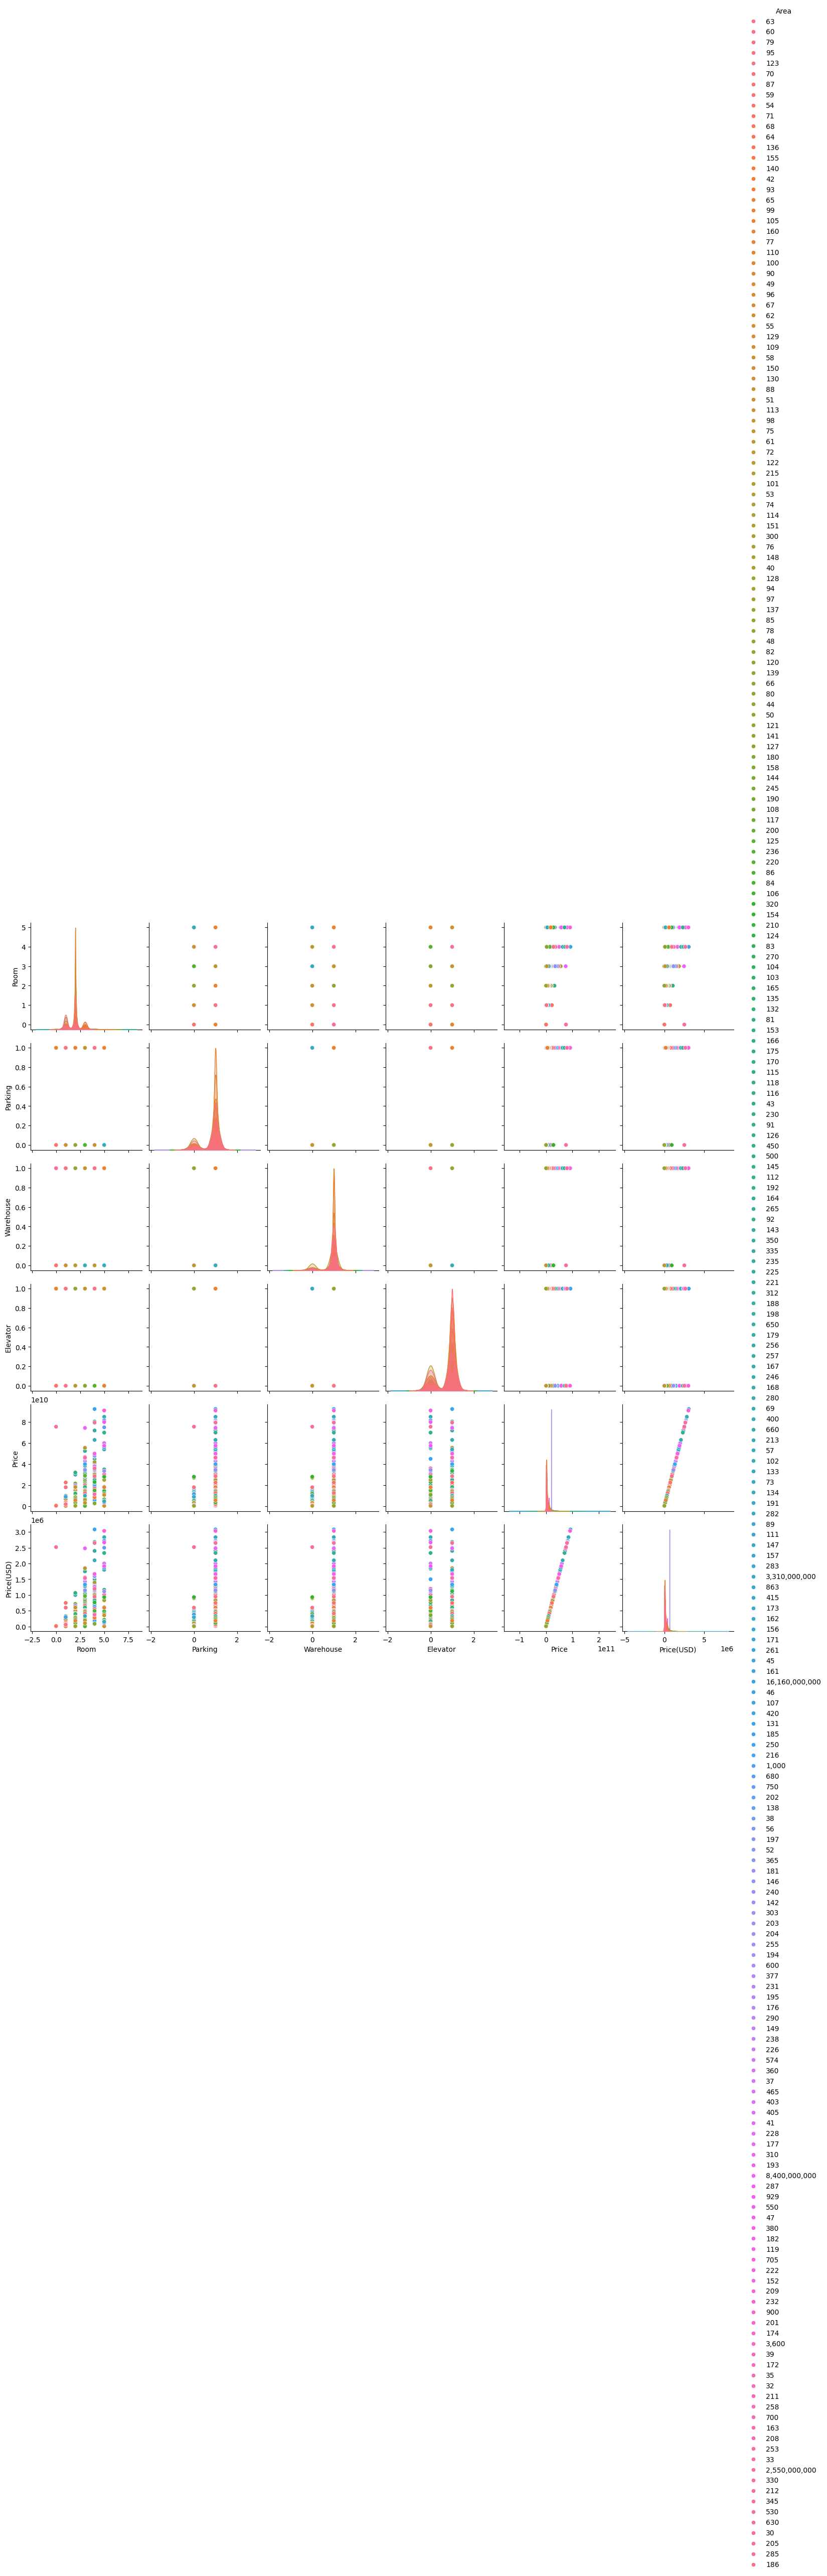

In [10]:
# comare based on Area
sns.pairplot(df, hue="Area")
plt.show()

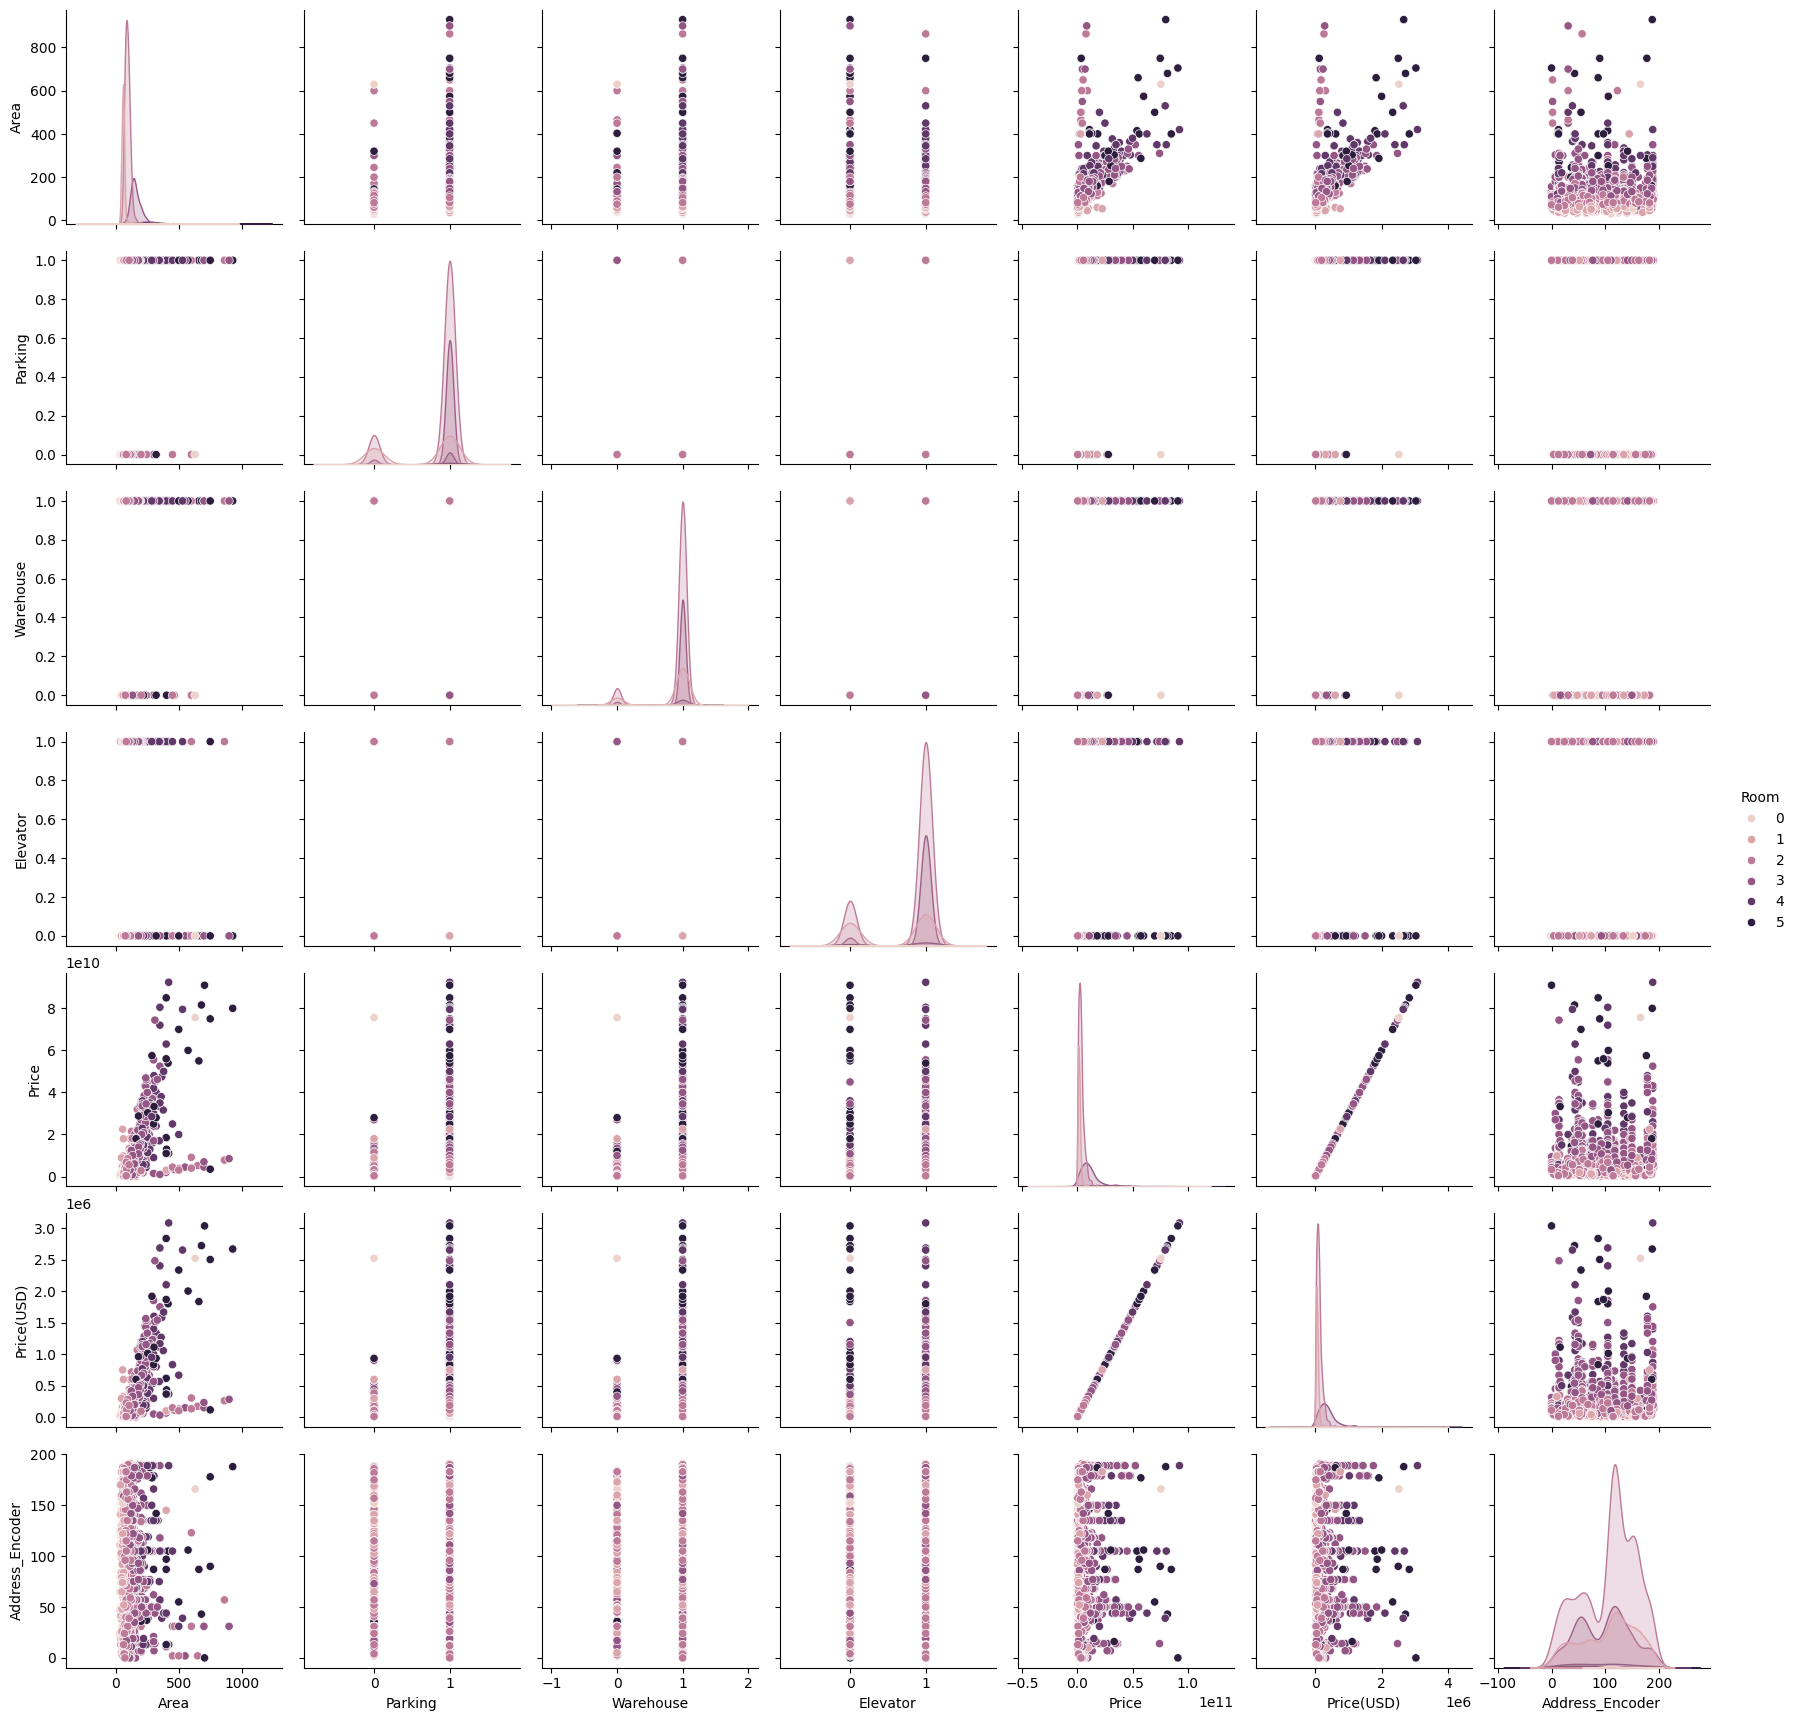

In [ ]:
# compared based on Room
sns.pairplot(df, hue="Room")
plt.show()

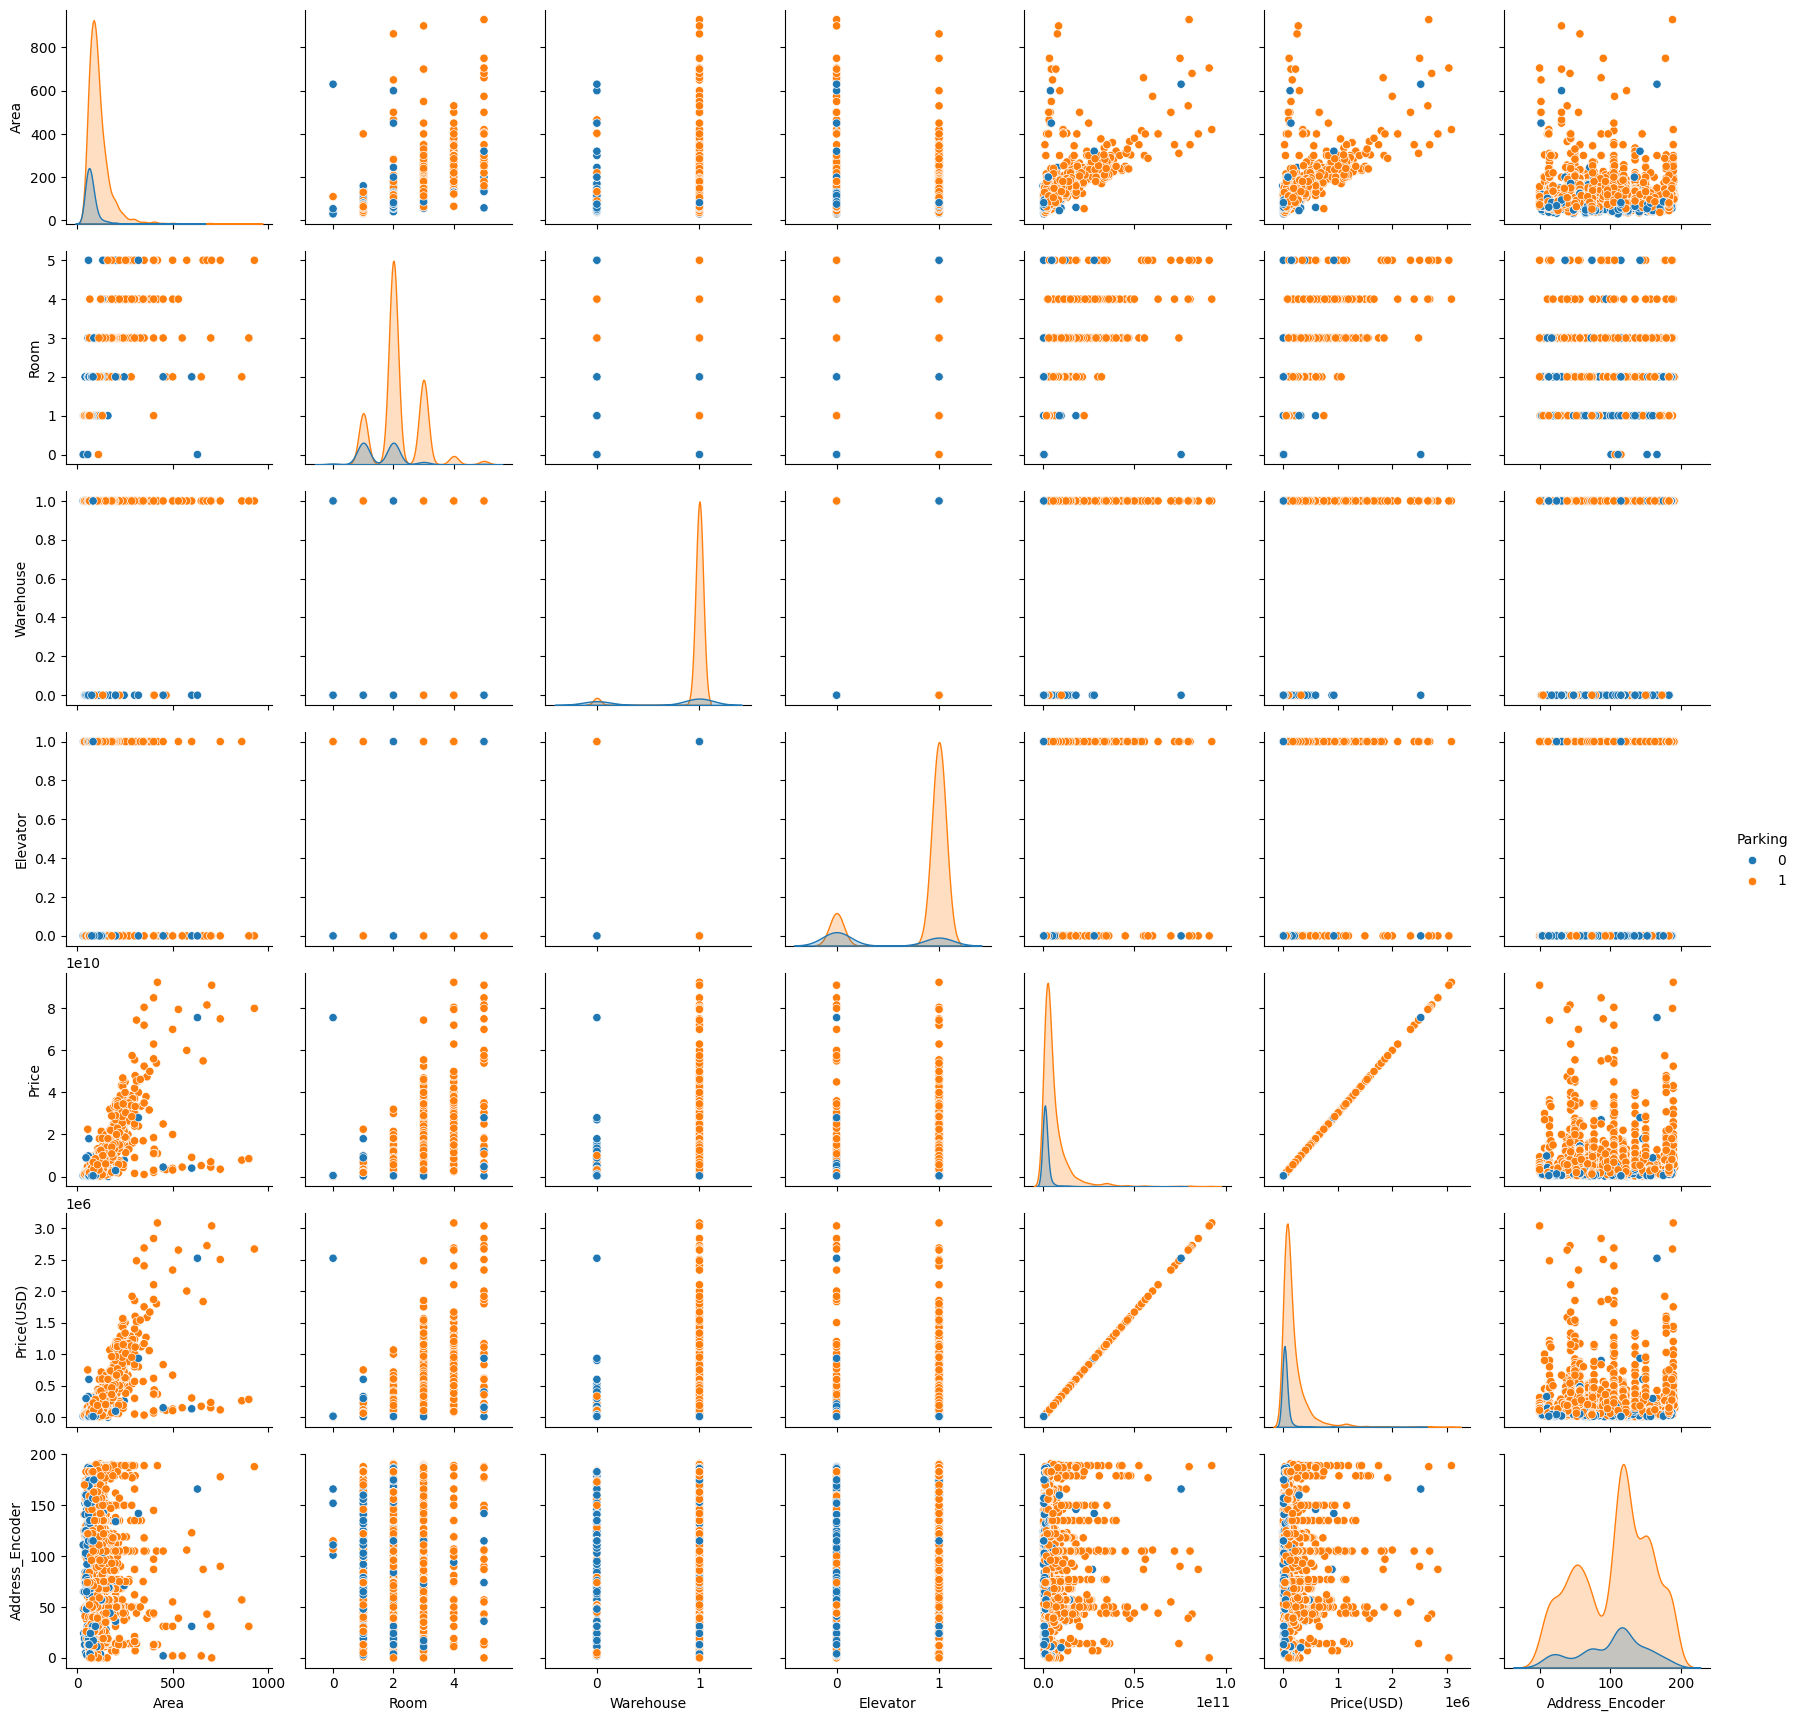

In [ ]:
# compared based on Parking
sns.pairplot(df, hue="Parking")
plt.show()

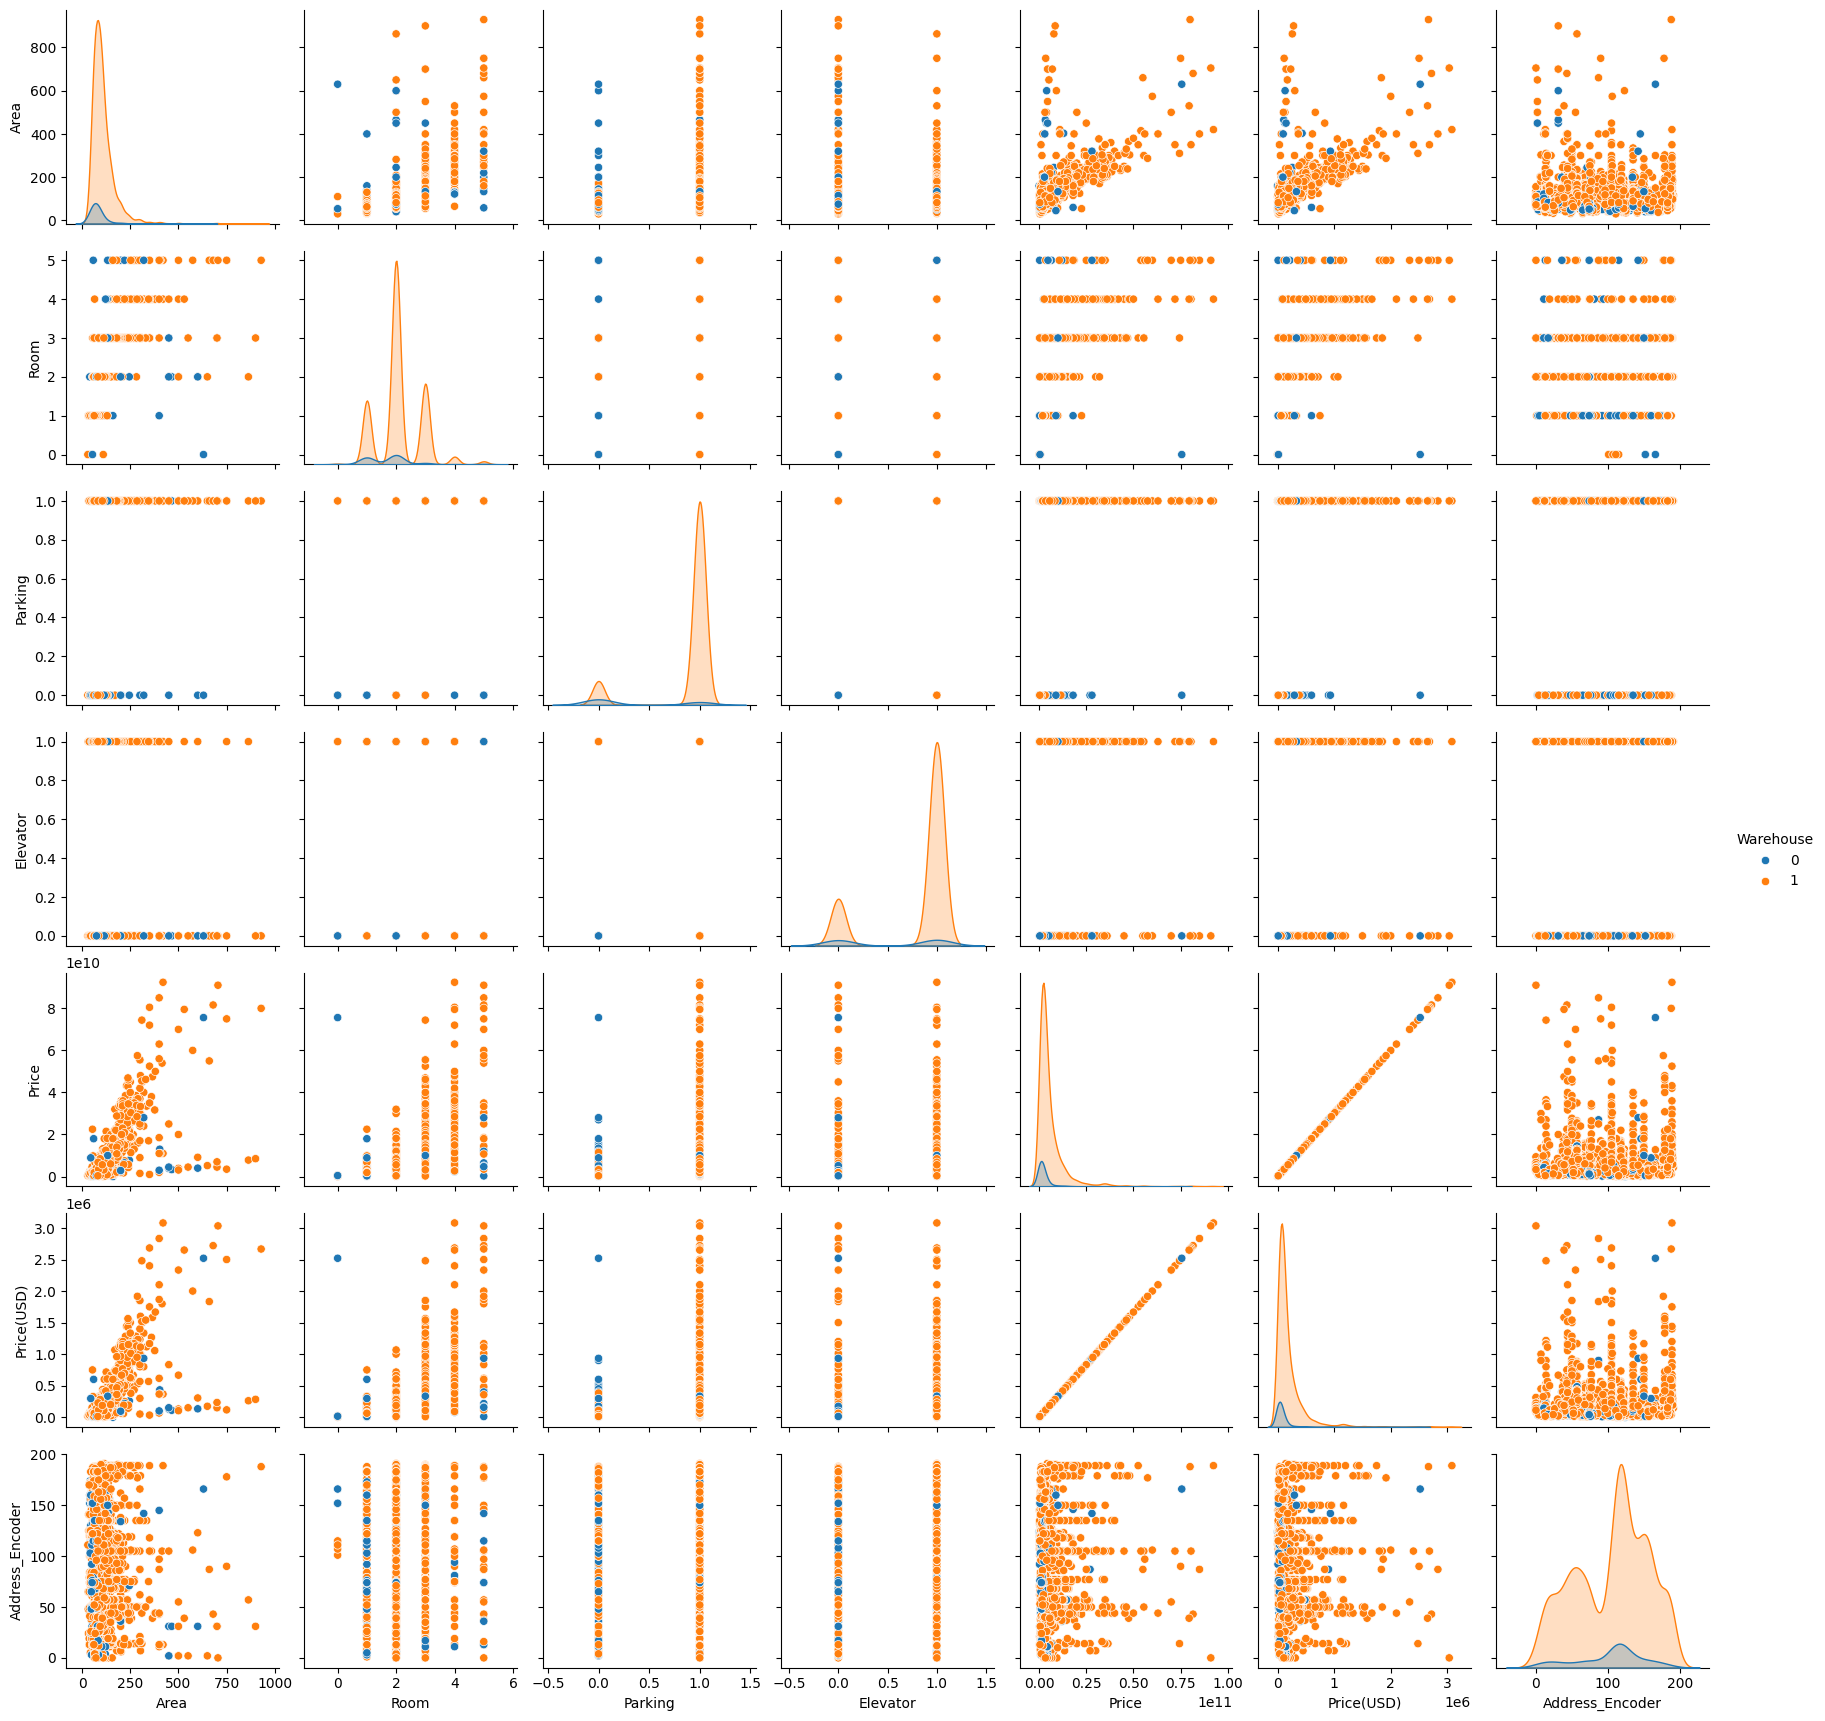

In [ ]:
# compared based on Warehouse
sns.pairplot(df, hue="Warehouse")
plt.show()

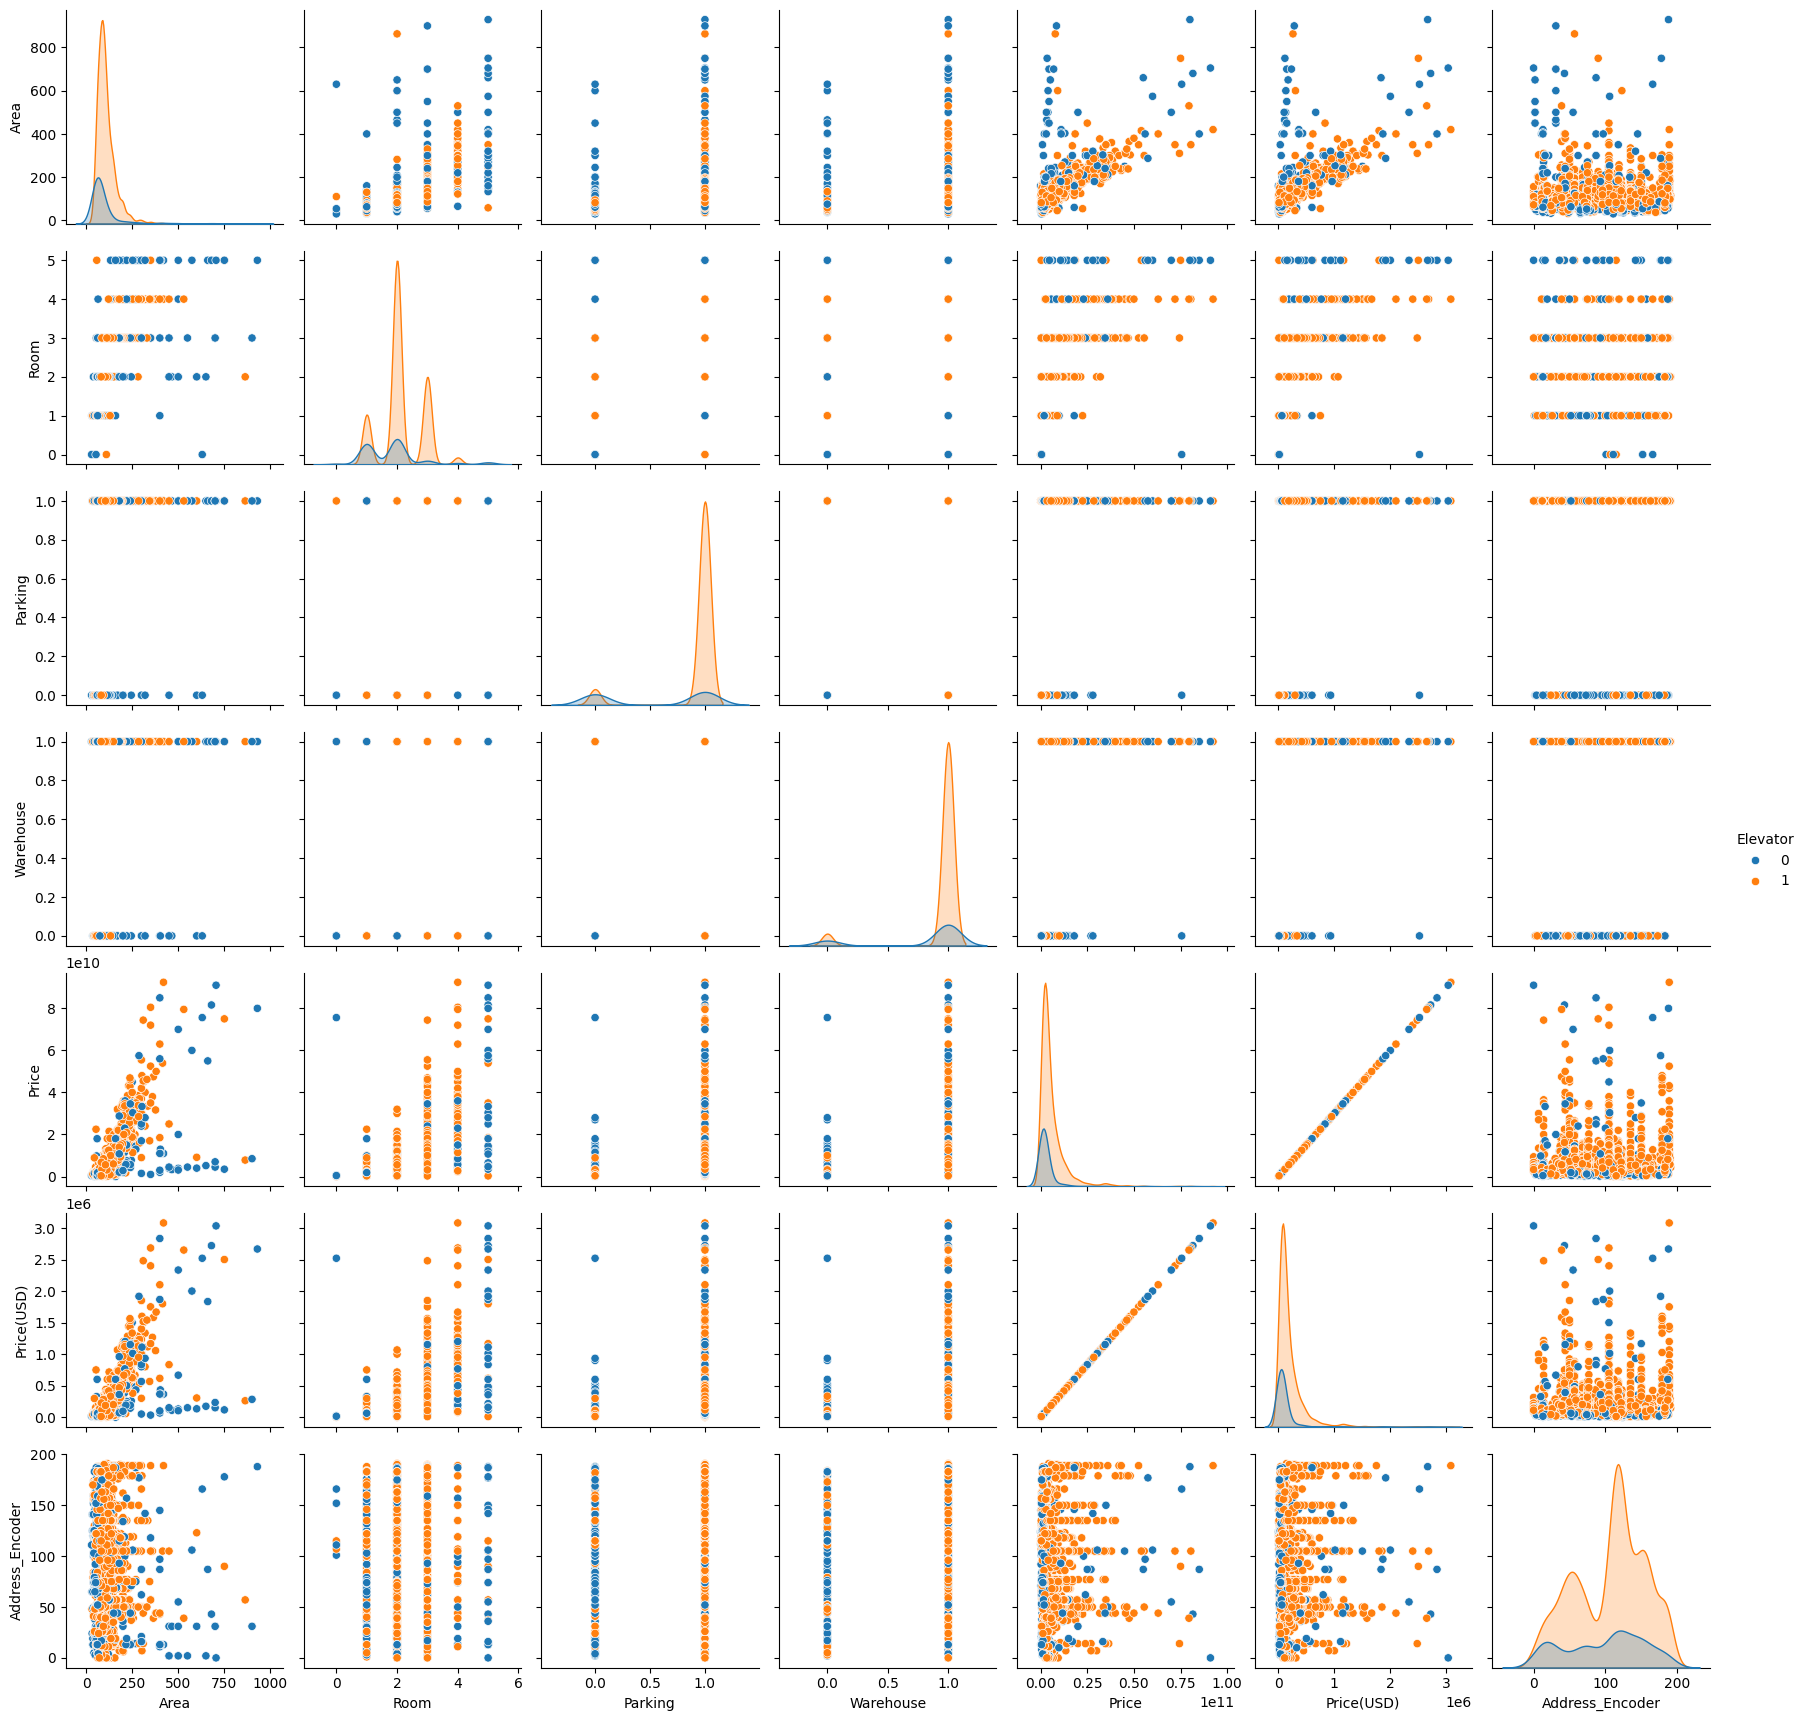

In [ ]:
# compared based on Elavator
sns.pairplot(df, hue="Elevator")
plt.show()

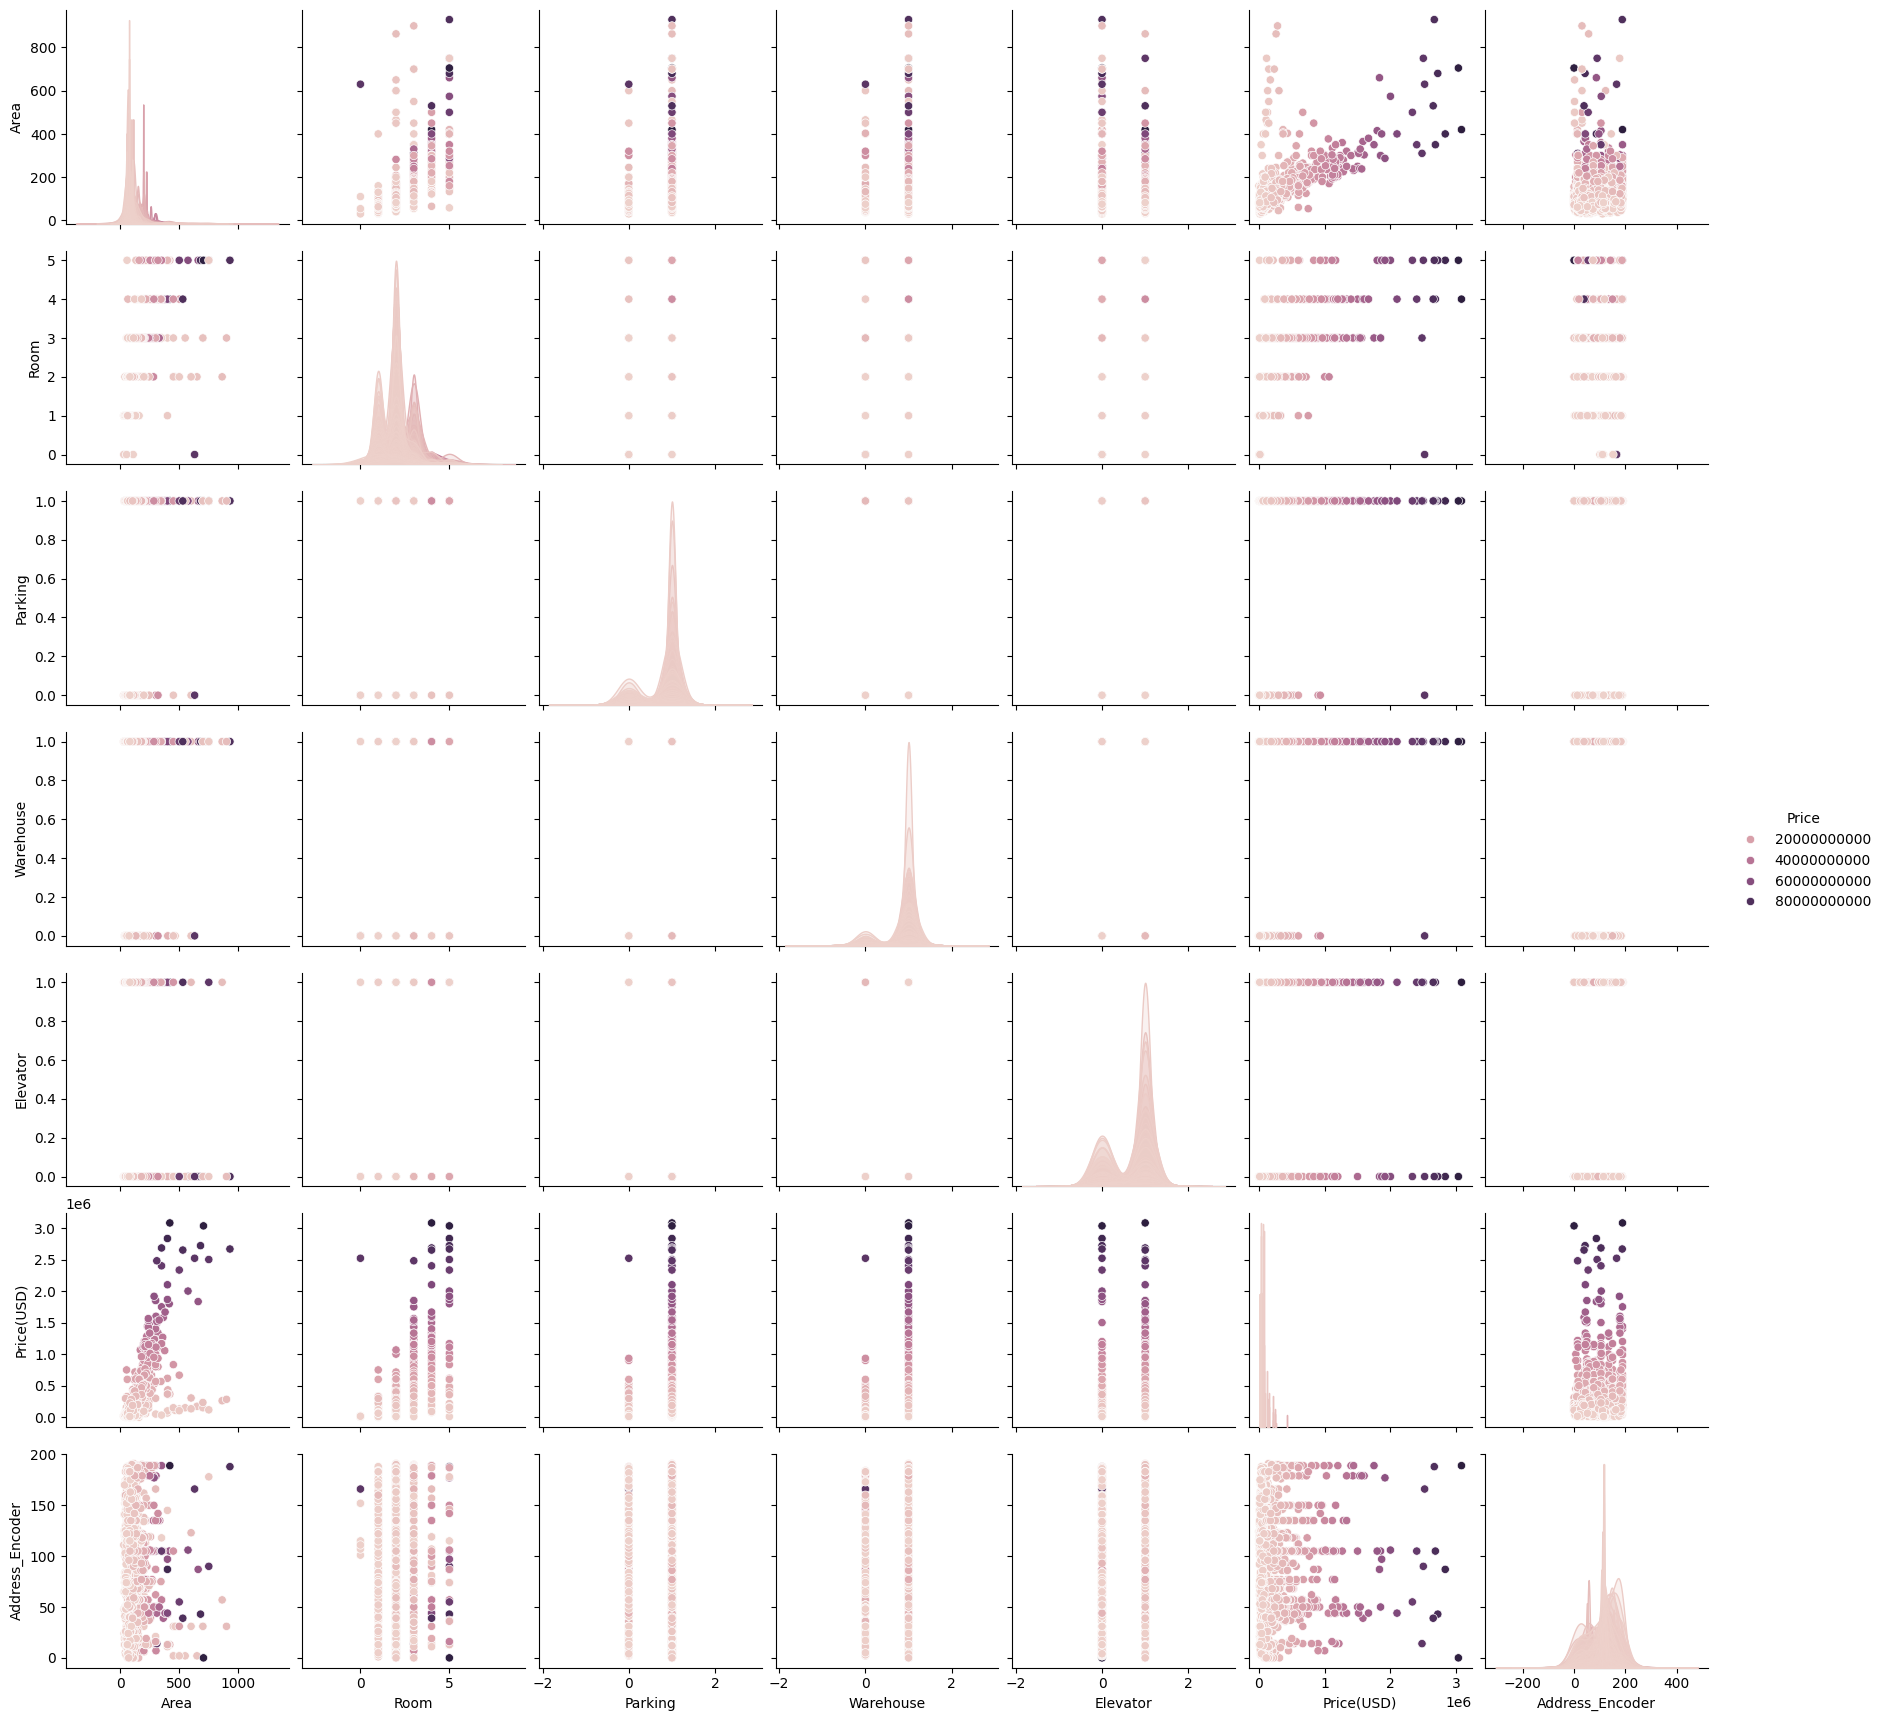

In [ ]:
# compared based on Price
sns.pairplot(df, hue="Price")
plt.show()

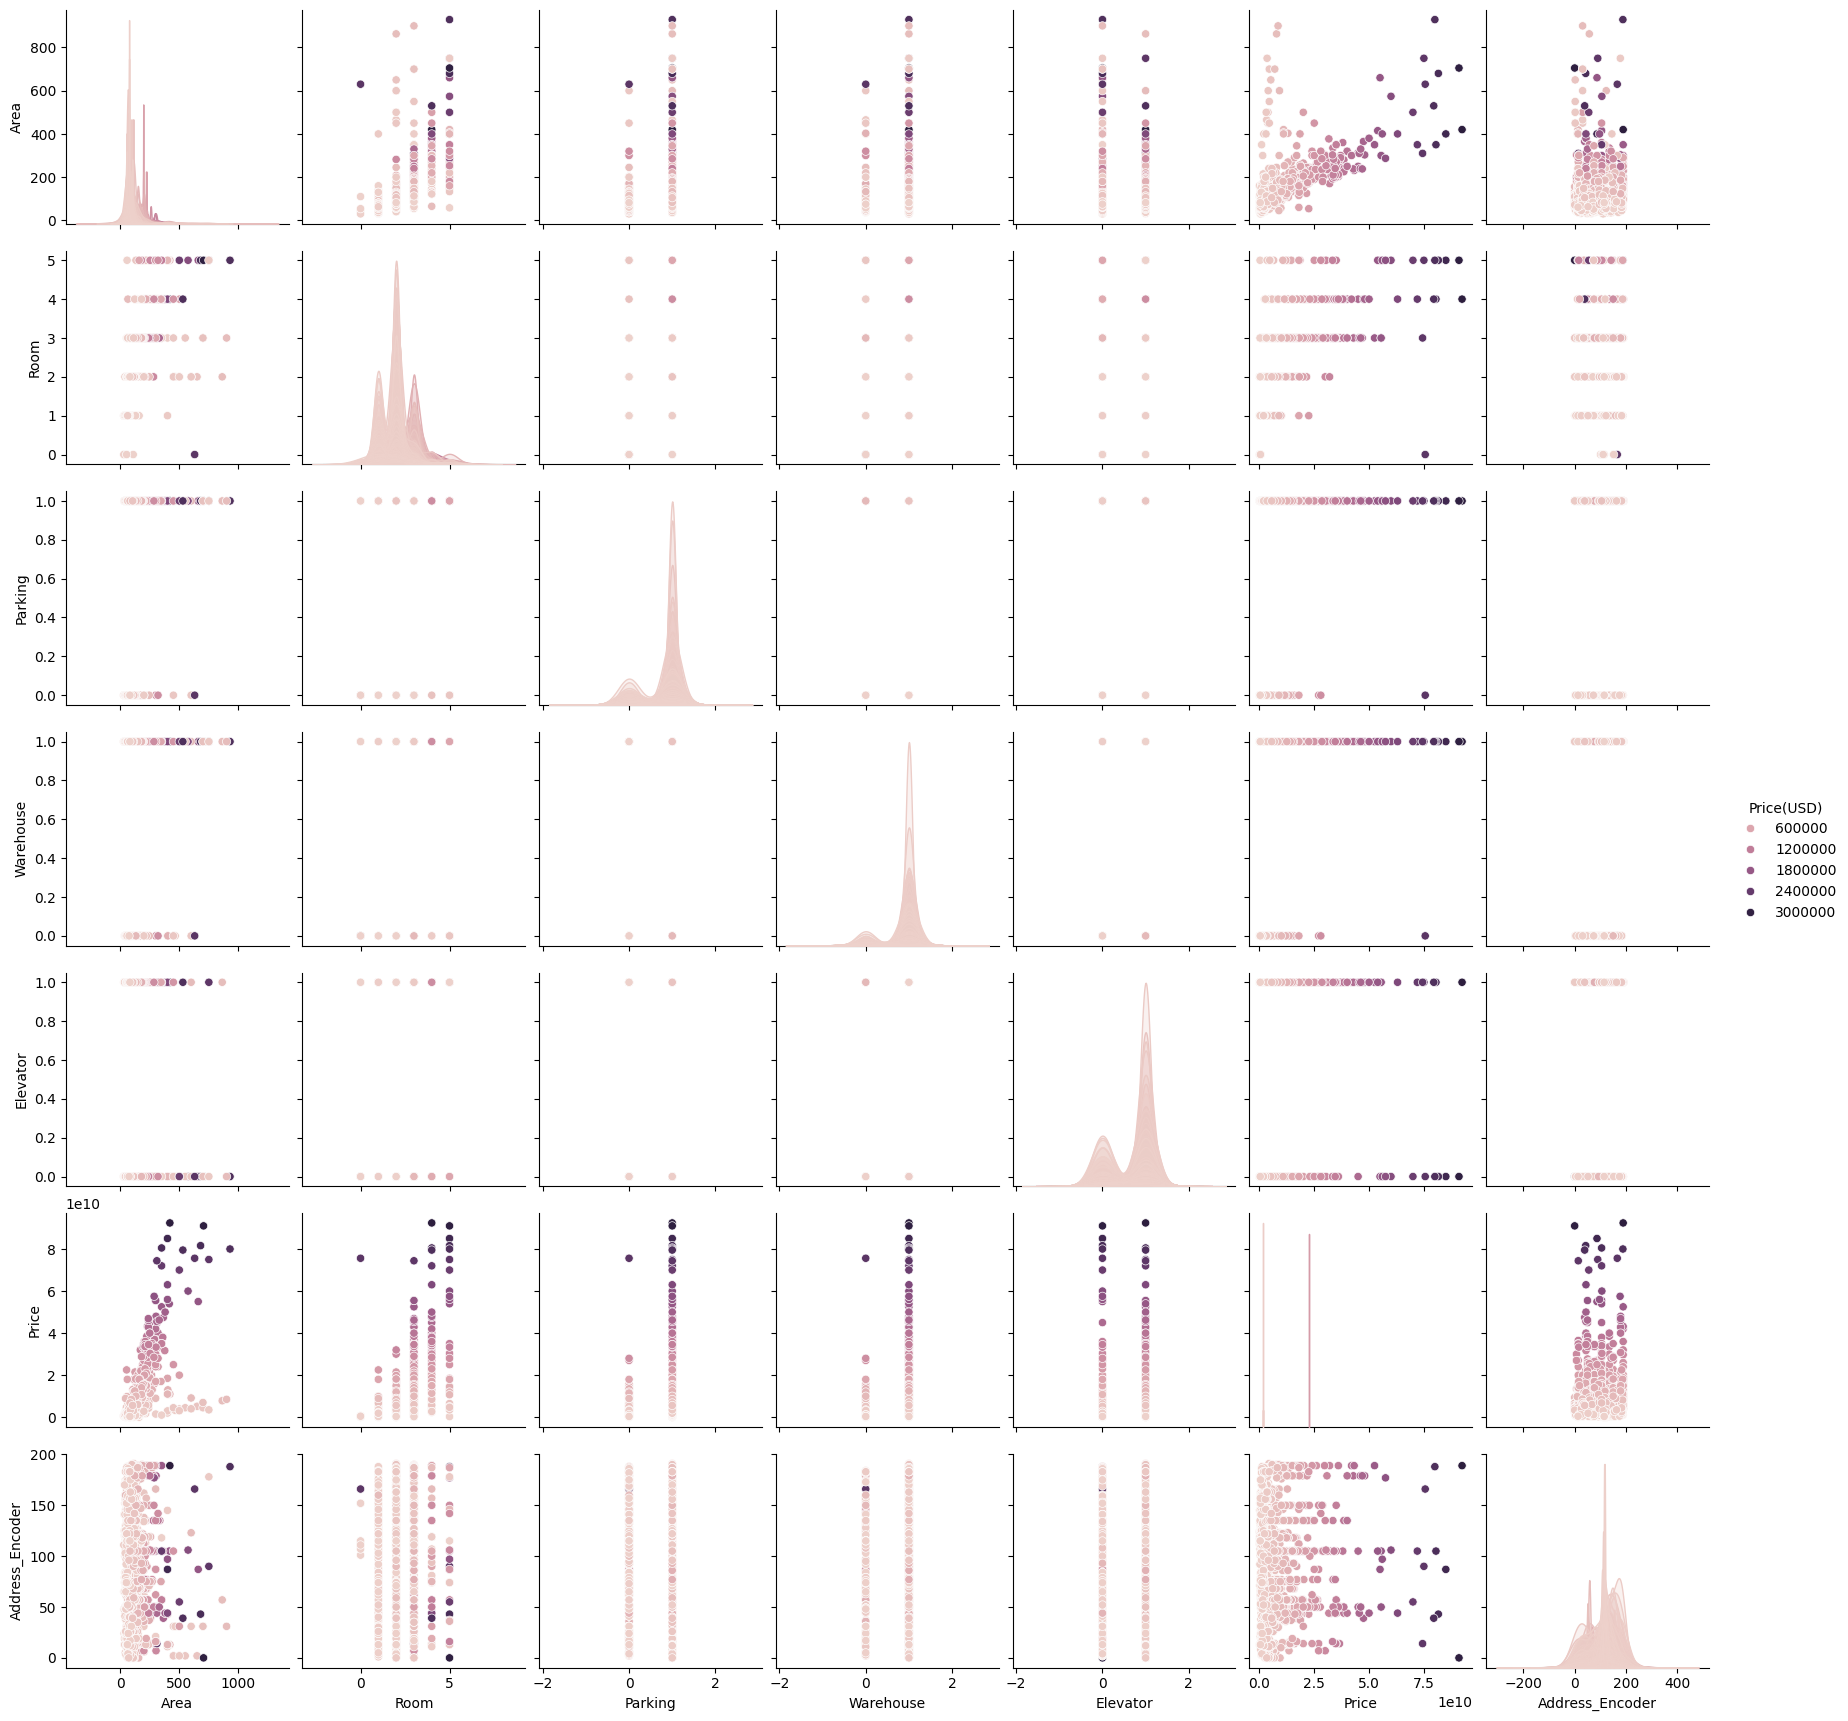

In [ ]:
# compared based on Price(USD)
sns.pairplot(df, hue="Price(USD)")
plt.show()

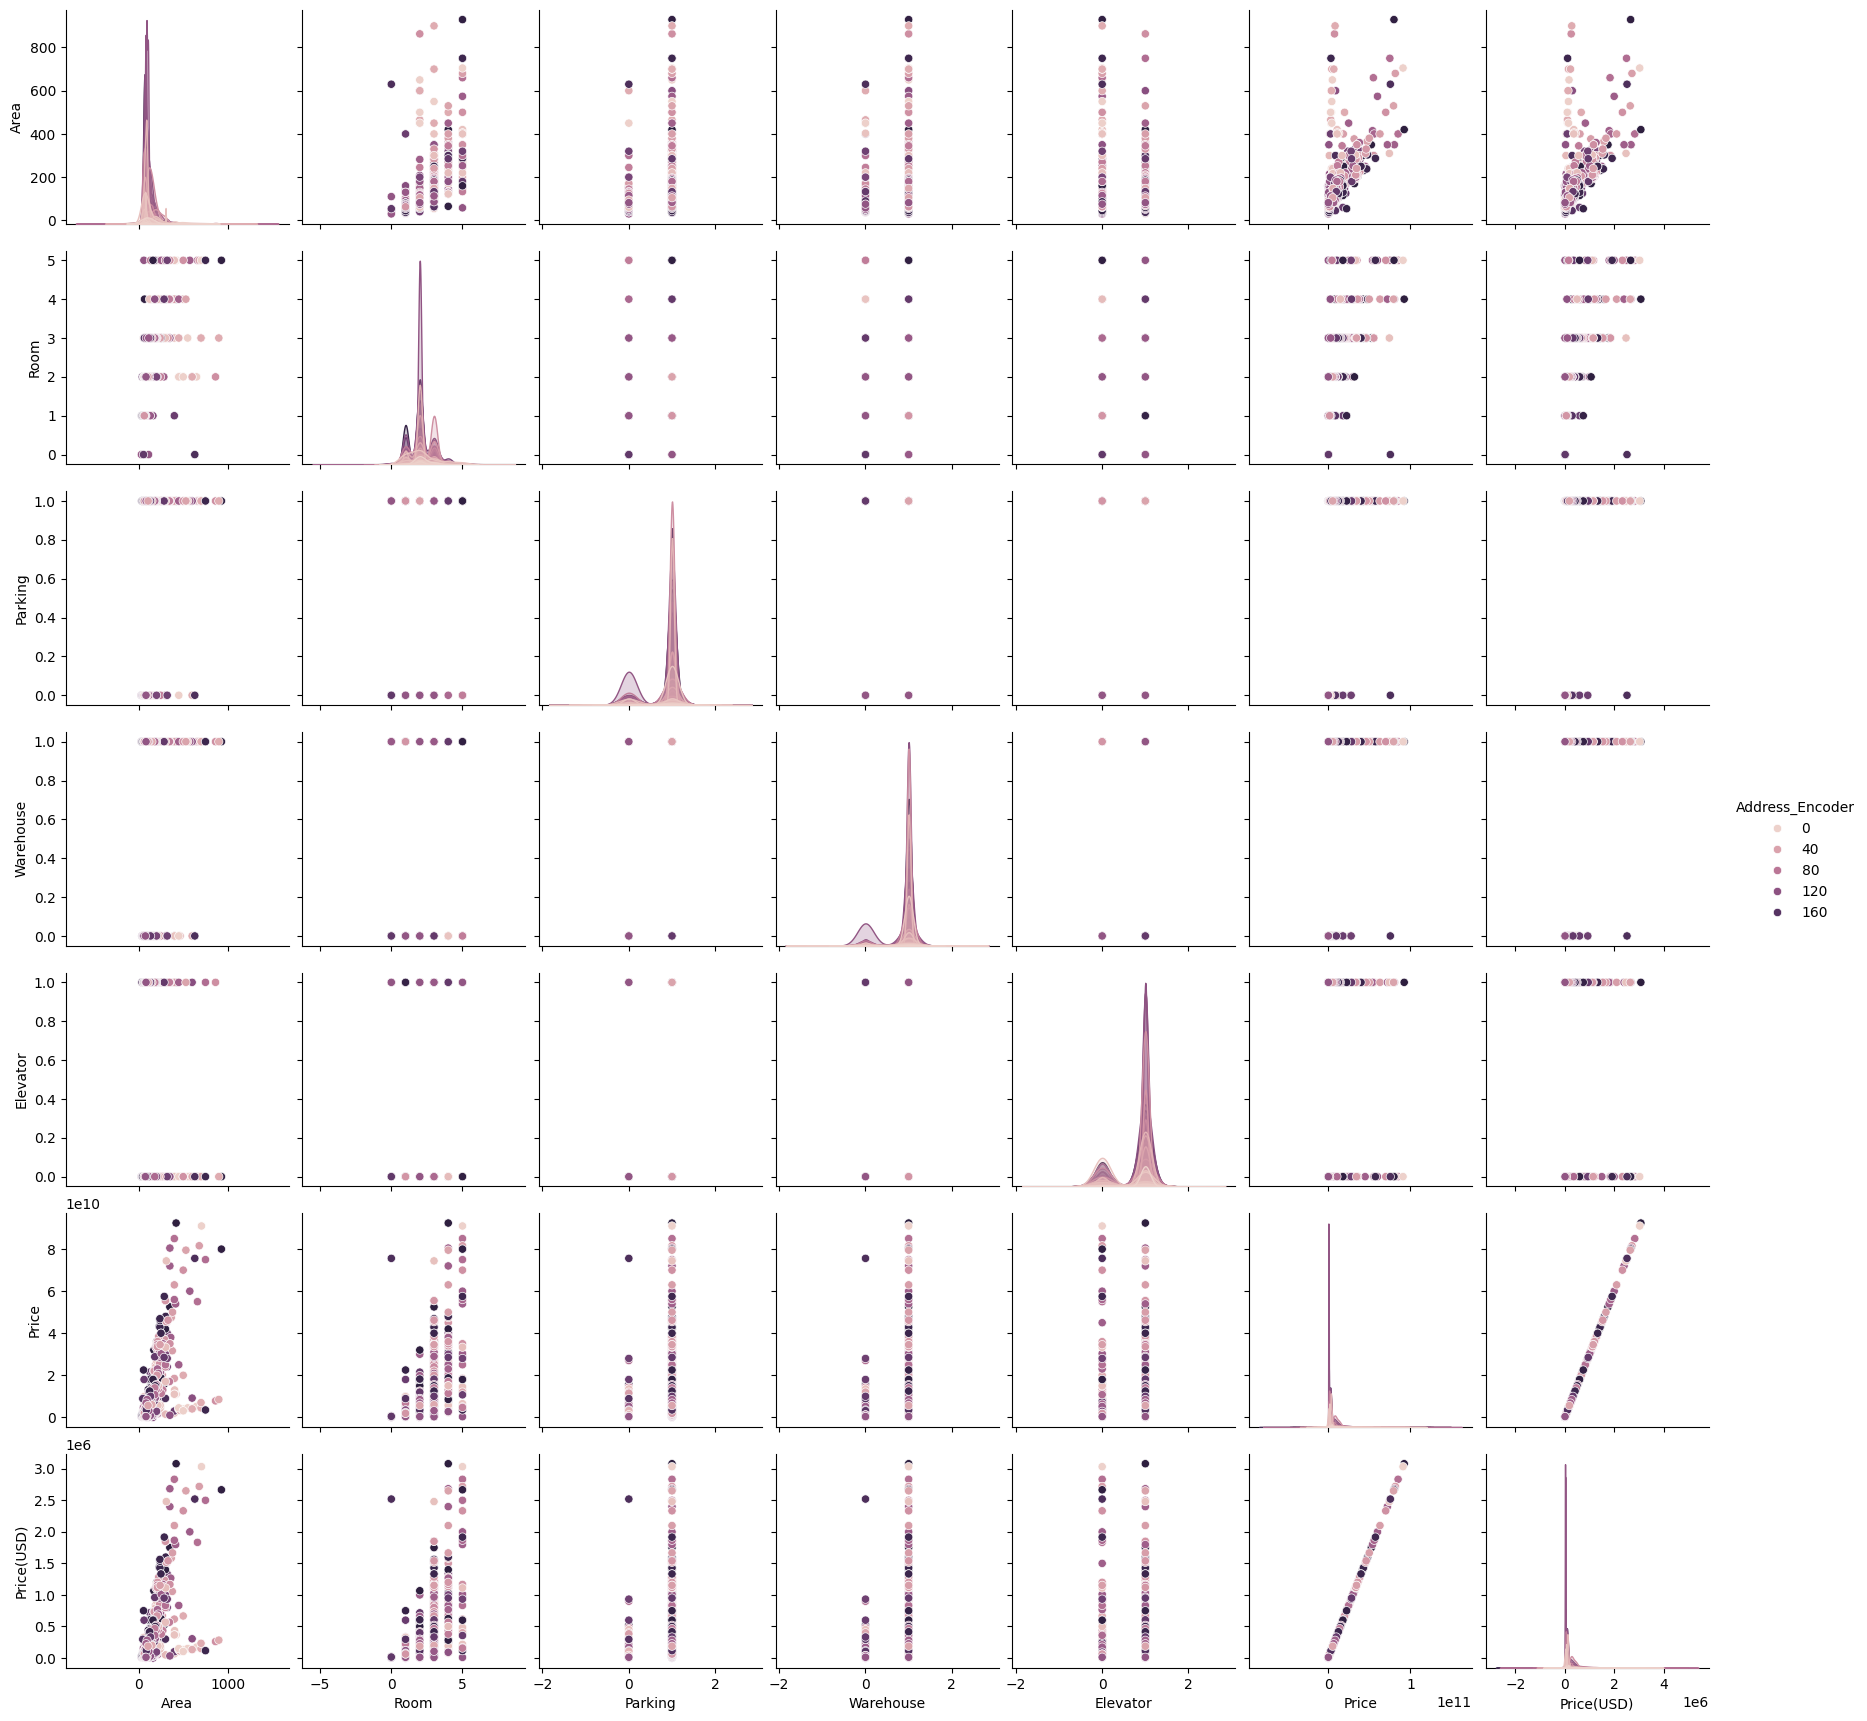

In [ ]:
# compare based on Address
sns.pairplot(df, hue="Address_Encoder")
plt.show()

## Recommendation

In [ ]:
address = "Pardis"
room = 2
parking = 1      # 0 یا 1
warehouse = 1    # 0 یا 1
elevator = 1     # 0 یا 1
target_price = 200000

filters = (df["Address"] == address) & (df["Room"] == room)
if parking is not None:
 filters &= (df["Parking"] == parking)
if warehouse is not None:
 filters &= (df["Warehouse"] == warehouse)
if elevator is not None:
 filters &= (df["Elevator"] == elevator)

results = df[filters].copy()


if results.empty:
 print("هیچ خانه‌ای با همه شرایط پیدا نشد. نزدیک‌ترین گزینه‌ها بر اساس Address و Room نمایش داده می‌شوند.")
results = df[(df["Address"] == address) & (df["Room"] == room)].copy()

results["PriceDiff"] = (results["Price(USD)"] - target_price).abs()
results = results.sort_values("PriceDiff")

recommendations = results.head(5)

print(recommendations[["Area","Room","Parking","Warehouse","Elevator","Address","Price(USD)"]])

      Area  Room  Parking  Warehouse  Elevator Address  Price(USD)
2332   100     2        1          1         0  Pardis       90000
1576   125     2        1          1         1  Pardis       70000
613    160     2        1          1         1  Pardis       66667
450    160     2        1          1         1  Pardis       64333
471    160     2        1          1         1  Pardis       64333
